In [ ]:
# Carrega a biblioteca pandas e atribui um alias chamado "pd"
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import xgboost as xgb

# Métricas de avaliação de modelos
from sklearn import metrics

# Deixar colunas e linhas aparentes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Conexão com o Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando os dados do arquivo CSV, especificando o separador decimal como vírgula
df = pd.read_csv("/content/drive/MyDrive/Tabelas - Projeto PCD/Colab/Tabelas/IndicTipDom_BR.xlsx.csv", decimal=",")

In [ ]:
print(df.columns)

Index(['Características selecionadas', 'População em idade de trabalhar',
       'População na força de trabalho', 'População ocupada\n',
       'População ocupada em trabalhos formais',
       'Taxa de participação_porcentagem', 'Nível de ocupação_porcentagem',
       'Taxa de formalização_porcentagem'],
      dtype='object')


In [ ]:
df.head(5)

Características selecionadas  \
0                                              Total   
1  Com alguma pessoa de 2 a 14 anos no domicílio ...   
2                       Alguma deficiência(2_14anos)   
3                       Deficiência visual(2_14anos)   
4                     Deficiência auditiva(2_14anos)   

  População em idade de trabalhar População na força de trabalho  \
0                        134 027                         98 655    
1                             NaN                            NaN   
2                          1 449                            940    
3                            553                            365    
4                            144                            100    

  População ocupada\n População ocupada em trabalhos formais  \
0             89 269                                 46 392    
1                 NaN                                    NaN   
2                816                                    322    
3                310                                    116    
4                 94                                     37    

   Taxa de participação_porcentagem  Nível de ocupação_porcentagem  \
0                              73.6                           66.6   
1                               NaN                            NaN   
2                              64.9                           56.3   
3                              66.1                           56.0   
4                              68.9                           65.0   

   Taxa de formalização_porcentagem  
0                              52.0  
1                               NaN  
2                              39.4  
3                              37.6  
4                              39.6

In [ ]:
#Pré-processamento de Dados

# Aplicando substituição da vírgula por nada
df = df.replace({',': ''}, regex=True)

# Mostrando informações do dataset
print("Informações do dataset:")
print(df.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Características selecionadas            57 non-null     object 
 1   População em idade de trabalhar         51 non-null     object 
 2   População na força de trabalho          51 non-null     object 
 3   População ocupada
                      51 non-null     object 
 4   População ocupada em trabalhos formais  51 non-null     object 
 5   Taxa de participação_porcentagem        51 non-null     float64
 6   Nível de ocupação_porcentagem           51 non-null     float64
 7   Taxa de formalização_porcentagem        51 non-null     float64
dtypes: float64(3), object(5)
memory usage: 3.8+ KB
None


In [ ]:
# Mostrando o número de linhas e colunas
print("\nNúmero de linhas e colunas:")
print("Linhas:", df.shape[0])
print("Colunas:", df.shape[1])


Número de linhas e colunas:
Linhas: 59
Colunas: 8


In [ ]:
# Mostrando as primeiras cinco linhas do dataset
print("\nPrimeiras cinco linhas do dataset:")
print(df.head())


Primeiras cinco linhas do dataset:
                        Características selecionadas  \
0                                              Total   
1  Com alguma pessoa de 2 a 14 anos no domicílio ...   
2                       Alguma deficiência(2_14anos)   
3                       Deficiência visual(2_14anos)   
4                     Deficiência auditiva(2_14anos)   

  População em idade de trabalhar População na força de trabalho  \
0                        134 027                         98 655    
1                             NaN                            NaN   
2                          1 449                            940    
3                            553                            365    
4                            144                            100    

  População ocupada\n População ocupada em trabalhos formais  \
0             89 269                                 46 392    
1                 NaN                                    NaN   
2                816      

In [ ]:
# Mostrando as últimas cinco linhas do dataset
print("\nÚltimas cinco linhas do dataset:")
print(df.tail())


Últimas cinco linhas do dataset:
                        Características selecionadas  \
54  Deficiência física (membros superiores(M60Mais))   
55  Deficiência física (membros inferiores(M60Mais))   
56                       Deficiência mental(M60Mais)   
57                  Mais de uma deficiência(M60Mais)   
58                          Sem deficiência(M60Mais)   

   População em idade de trabalhar População na força de trabalho  \
54                          2 924                            255    
55                          4 310                            371    
56                            958                             78    
57                          3 120                            230    
58                         12 681                          2 607    

   População ocupada\n População ocupada em trabalhos formais  \
54                241                                     77    
55                354                                     85    
56                 

In [ ]:
# Mostrando cinco amostras aleatórias do dataset
print("\nCinco amostras aleatórias do dataset:")
print(df.sample(5))


Cinco amostras aleatórias do dataset:
        Características selecionadas População em idade de trabalhar  \
37  Mais de uma deficiência(H60Mais)                          1 810    
4     Deficiência auditiva(2_14anos)                            144    
40                          Mulheres                         69 682    
32       Deficiência visual(H60Mais)                          1 726    
16      Deficiência mental(60ouMais)                          1 565    

   População na força de trabalho População ocupada\n  \
37                           307                 287    
4                            100                  94    
40                        45 577              40 274    
32                           354                 340    
16                           167                 162    

   População ocupada em trabalhos formais  Taxa de participação_porcentagem  \
37                                    82                               17.0   
4                          

In [ ]:
# Tipos de dados
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
Características selecionadas               object
População em idade de trabalhar            object
População na força de trabalho             object
População ocupada\n                        object
População ocupada em trabalhos formais     object
Taxa de participação_porcentagem          float64
Nível de ocupação_porcentagem             float64
Taxa de formalização_porcentagem          float64
dtype: object


In [ ]:
colunas_numericas = df.select_dtypes(include='number')
colunas_numericas.head()

Taxa de participação_porcentagem  Nível de ocupação_porcentagem  \
0                              73.6                           66.6   
1                               NaN                            NaN   
2                              64.9                           56.3   
3                              66.1                           56.0   
4                              68.9                           65.0   

   Taxa de formalização_porcentagem  
0                              52.0  
1                               NaN  
2                              39.4  
3                              37.6  
4                              39.6

In [ ]:
df['População em idade de trabalhar'] = pd.to_numeric(df['População em idade de trabalhar'], errors='coerce')
df['População em idade de trabalhar'].sample(10)

29      NaN
33    964.0
34      NaN
57      NaN
8     218.0
5     373.0
24     73.0
22    636.0
7     467.0
53      NaN
Name: População em idade de trabalhar, dtype: float64

In [ ]:
df['População na força de trabalho'] = pd.to_numeric(df['População na força de trabalho'], errors='coerce')
df['População na força de trabalho'].head(10)

0      NaN
1      NaN
2    940.0
3    365.0
4    100.0
5    248.0
6    169.0
7    272.0
8    129.0
9      NaN
Name: População na força de trabalho, dtype: float64

In [ ]:
df['População ocupada\n'] = pd.to_numeric(df['População ocupada\n'], errors='coerce')
df['População ocupada\n'].sample(10)

46     62.0
40      NaN
28     67.0
33    182.0
15    787.0
5     220.0
36     87.0
13    287.0
22    454.0
57    217.0
Name: População ocupada\n, dtype: float64

In [ ]:
df['População ocupada em trabalhos formais'] = pd.to_numeric(df['População ocupada em trabalhos formais'], errors='coerce')
df['População ocupada em trabalhos formais'].sample(10)

53     37.0
48     10.0
1       NaN
33     59.0
18      NaN
54     77.0
2     322.0
14    147.0
13     97.0
37     82.0
Name: População ocupada em trabalhos formais, dtype: float64

In [ ]:
colunas_numericas = df.select_dtypes(include='number')
colunas_numericas.head()

População em idade de trabalhar  População na força de trabalho  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                           940.0   
3                            553.0                           365.0   
4                            144.0                           100.0   

   População ocupada\n  População ocupada em trabalhos formais  \
0                  NaN                                     NaN   
1                  NaN                                     NaN   
2                816.0                                   322.0   
3                310.0                                   116.0   
4                 94.0                                    37.0   

   Taxa de participação_porcentagem  Nível de ocupação_porcentagem  \
0                              73.6                           66.6   
1                               NaN                            NaN   
2                              64.9                           56.3   
3                              66.1                           56.0   
4                              68.9                           65.0   

   Taxa de formalização_porcentagem  
0                              52.0  
1                               NaN  
2                              39.4  
3                              37.6  
4                              39.6

#**População em idade de trabalhar [unidades de milhar]**

##### 1. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 2 a 14 anos no domicílio**

In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Visual = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_auditiva = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsSup = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(2_14anos))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsInf = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(2_14anos))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mental = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mais1 = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
sem_deficiencia = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica = deficiencia_fsSup - deficiencia_fsInf

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com idade para Trabalhar.".format(Alg_deficiencia))
print("População com deficiência visual: {} com idade para Trabalhar.".format(deficiencia_Visual))
print("População com deficiência auditiva: {} com idade para Trabalhar.".format(deficiencia_auditiva))
print("População com deficiência mental: {} com idade para Trabalhar.".format(deficiencia_Mental))
print("População com mais de uma deficiência: {} com idade para Trabalhar.".format(deficiencia_Mais1))
print("População com deficiência física (membros superiores): {} com idade para Trabalhar.".format(deficiencia_fsSup))
print("População com deficiência física (membros inferiores): {} com idade para Trabalhar.".format(deficiencia_fsInf))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica)))


População com alguma deficiência: 1449 com idade para Trabalhar.
População com deficiência visual: 553 com idade para Trabalhar.
População com deficiência auditiva: 144 com idade para Trabalhar.
População com deficiência mental: 467 com idade para Trabalhar.
População com mais de uma deficiência: 218 com idade para Trabalhar.
População com deficiência física (membros superiores): 373 com idade para Trabalhar.
População com deficiência física (membros inferiores): 276 com idade para Trabalhar.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 97 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_idade_trabalhar = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(tipos_deficiencia, populacao_idade_trabalhar, color='skyblue')
plt.xlabel('População em idade de trabalhar (em milhares)')
plt.ylabel('Tipo de Deficiência')
plt.title('População em idade de trabalhar por tipo de deficiência')
plt.gca().invert_yaxis()  # Inverter os eixos para que a deficiência mais comum seja exibida no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

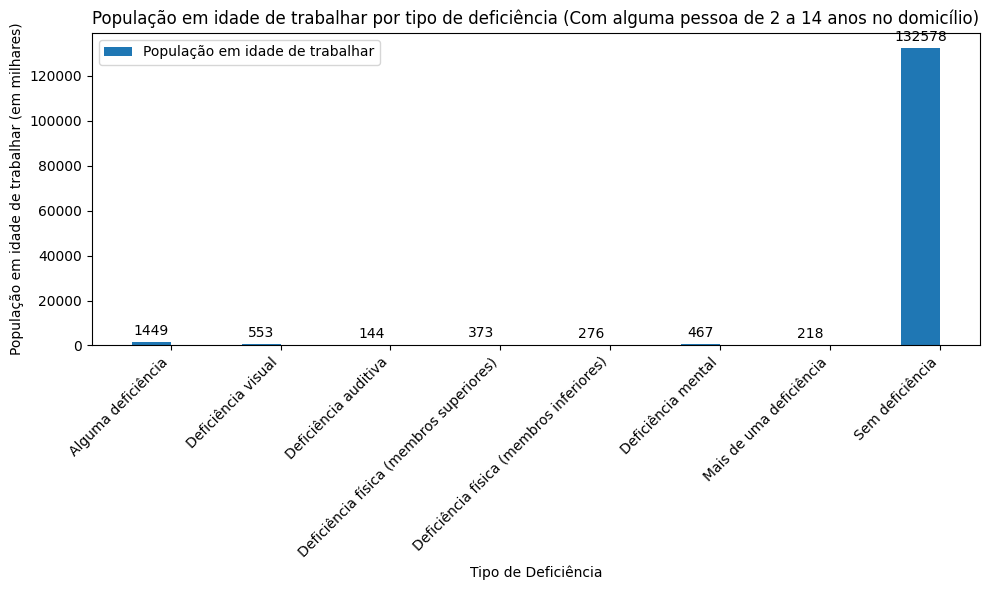

In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_idade_trabalhar = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_idade_trabalhar, width, label='População em idade de trabalhar')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Com alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####2. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 60 anos ou mais no domicílio**

In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_1_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(60ouMais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Visual_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(60ouMais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_auditiva_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(60ouMais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsSup_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(60ouMais))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsInf_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(60ouMais))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mental_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(60ouMais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mais1_1_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(60ouMais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
sem_deficiencia_1_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(60ouMais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = deficiencia_fsSup_1_ - deficiencia_fsInf_1_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com idade para Trabalhar.".format(Alg_deficiencia_1_))
print("População com deficiência visual: {} com idade para Trabalhar.".format(deficiencia_Visual_1_))
print("População com deficiência auditiva: {} com idade para Trabalhar.".format(deficiencia_auditiva_1_))
print("População com deficiência mental: {} com idade para Trabalhar.".format(deficiencia_Mental_1_))
print("População com mais de uma deficiência: {} com idade para Trabalhar.".format(deficiencia_Mais1_1_))
print("População com deficiência física (membros superiores): {} com idade para Trabalhar.".format(deficiencia_fsSup_1_))
print("População com deficiência física (membros inferiores): {} com idade para Trabalhar.".format(deficiencia_fsInf_1_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_1_)))


População com alguma deficiência: 11128 com idade para Trabalhar.
População com deficiência visual: 4335 com idade para Trabalhar.
População com deficiência auditiva: 2226 com idade para Trabalhar.
População com deficiência mental: 1565 com idade para Trabalhar.
População com mais de uma deficiência: 4930 com idade para Trabalhar.
População com deficiência física (membros superiores): 4575 com idade para Trabalhar.
População com deficiência física (membros inferiores): 6793 com idade para Trabalhar.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 2218 pessoas.


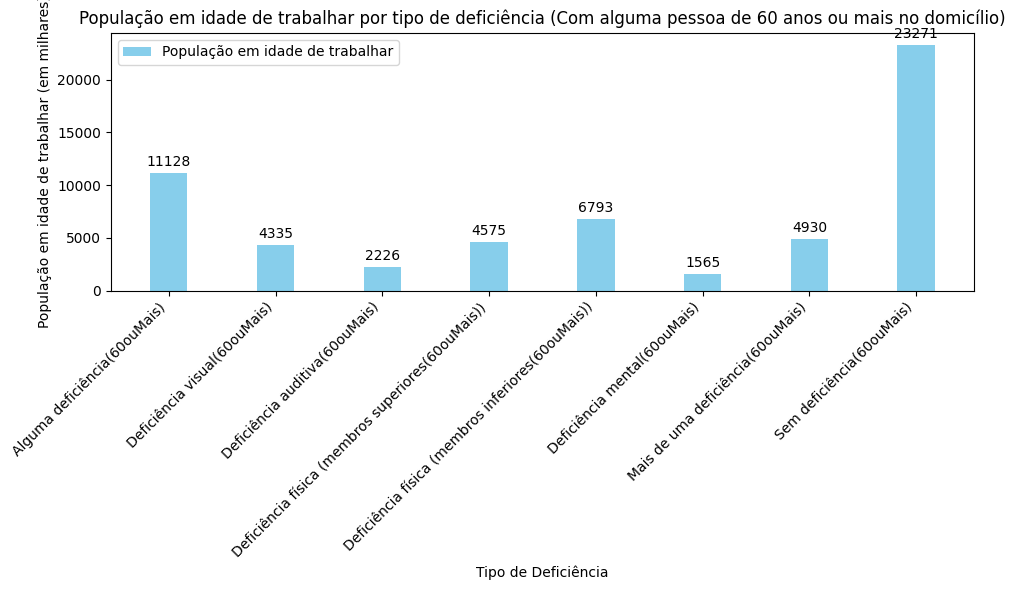

In [ ]:
# Definindo os dados
tipos_deficiencia_1_= ['Alguma deficiência(60ouMais)',
'Deficiência visual(60ouMais)',
'Deficiência auditiva(60ouMais)',
'Deficiência física (membros superiores(60ouMais))',
'Deficiência física (membros inferiores(60ouMais))',
'Deficiência mental(60ouMais)',
'Mais de uma deficiência(60ouMais)',
'Sem deficiência(60ouMais)']
populacao_idade_trabalhar_1_ = [Alg_deficiencia_1_, deficiencia_Visual_1_, deficiencia_auditiva_1_, deficiencia_fsSup_1_, deficiencia_fsInf_1_, deficiencia_Mental_1_, deficiencia_Mais1_1_, sem_deficiencia_1_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_idade_trabalhar_1_, width, label='População em idade de trabalhar', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_1_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


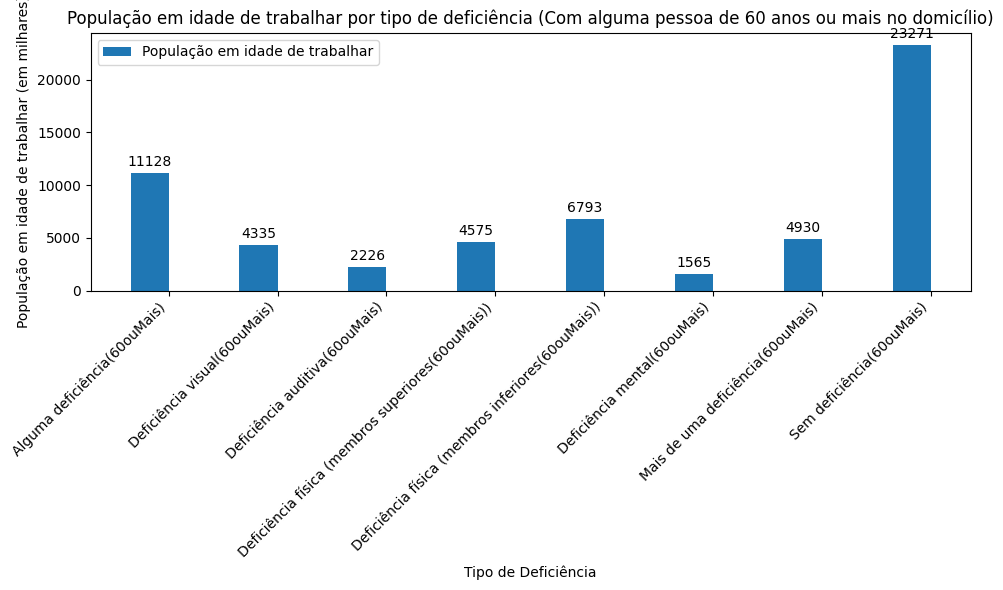

In [ ]:
# Definindo os dados
tipos_deficiencia_1_= ['Alguma deficiência(60ouMais)',
'Deficiência visual(60ouMais)',
'Deficiência auditiva(60ouMais)',
'Deficiência física (membros superiores(60ouMais))',
'Deficiência física (membros inferiores(60ouMais))',
'Deficiência mental(60ouMais)',
'Mais de uma deficiência(60ouMais)',
'Sem deficiência(60ouMais)']
populacao_idade_trabalhar_1_ = [Alg_deficiencia_1_, deficiencia_Visual_1_, deficiencia_auditiva_1_, deficiencia_fsSup_1_, deficiencia_fsInf_1_, deficiencia_Mental_1_, deficiencia_Mais1_1_, sem_deficiencia_1_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_1_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_idade_trabalhar_1_, width, label='População em idade de trabalhar')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_1_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 3. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem com alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_2_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Visual_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(H2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_auditiva_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsSup_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores)(H2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsInf_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores)(H2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mental_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(H2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mais1_2_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
sem_deficiencia_2_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(H2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_2_ = deficiencia_fsSup_2_ - deficiencia_fsInf_2_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com idade para Trabalhar.".format(Alg_deficiencia_2_))
print("População com deficiência visual: {} com idade para Trabalhar.".format(deficiencia_Visual_2_))
print("População com deficiência auditiva: {} com idade para Trabalhar.".format(deficiencia_auditiva_2_))
print("População com deficiência mental: {} com idade para Trabalhar.".format(deficiencia_Mental_2_))
print("População com mais de uma deficiência: {} com idade para Trabalhar.".format(deficiencia_Mais1_2_))
print("População com deficiência física (membros superiores): {} com idade para Trabalhar.".format(deficiencia_fsSup_2_))
print("População com deficiência física (membros inferiores): {} com idade para Trabalhar.".format(deficiencia_fsInf_2_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_2_)))


População com alguma deficiência: 636 com idade para Trabalhar.
População com deficiência visual: 244 com idade para Trabalhar.
População com deficiência auditiva: 73 com idade para Trabalhar.
População com deficiência mental: 192 com idade para Trabalhar.
População com mais de uma deficiência: 93 com idade para Trabalhar.
População com deficiência física (membros superiores): 159 com idade para Trabalhar.
População com deficiência física (membros inferiores): 124 com idade para Trabalhar.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 35 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
'Deficiência visual(H2_14anos)',
'Deficiência auditiva(H2_14anos)',
'Deficiência física (membros superiores)(H2_14anos)',
'Deficiência física (membros inferiores)(H2_14anos)',
'Deficiência mental(H2_14anos)',
'Mais de uma deficiência(H2_14anos)',
'Sem deficiência(H2_14anos)']
populacao_idade_trabalhar_2_ = [Alg_deficiencia_2_, deficiencia_Visual_2_, deficiencia_auditiva_2_, deficiencia_fsSup_2_, deficiencia_fsInf_2_, deficiencia_Mental_2_, deficiencia_Mais1_2_, sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_idade_trabalhar_2_, width, label='População em idade de trabalhar', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Homem com alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


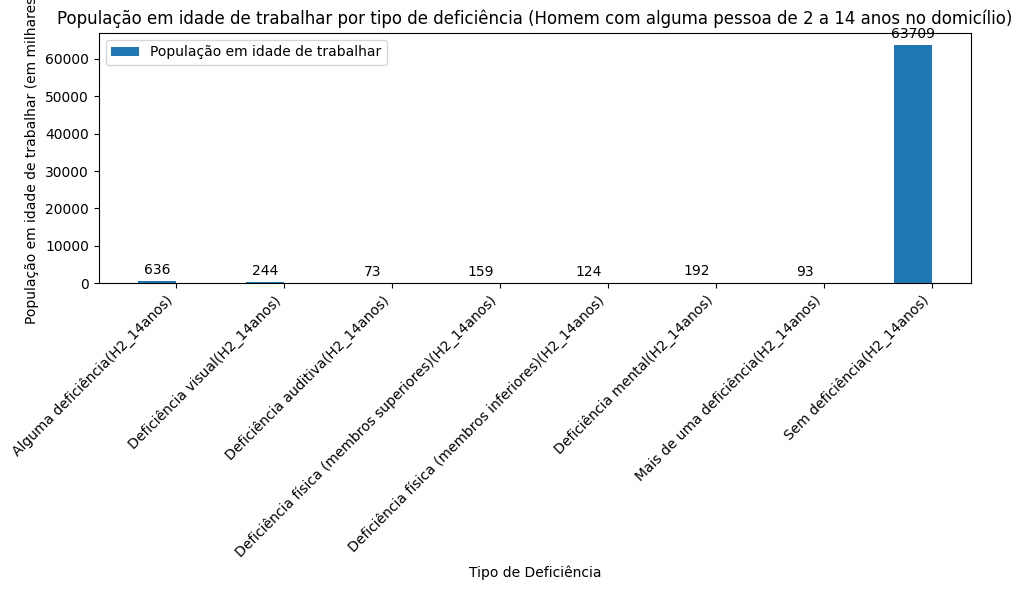

In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
'Deficiência visual(H2_14anos)',
'Deficiência auditiva(H2_14anos)',
'Deficiência física (membros superiores)(H2_14anos)',
'Deficiência física (membros inferiores)(H2_14anos)',
'Deficiência mental(H2_14anos)',
'Mais de uma deficiência(H2_14anos)',
'Sem deficiência(H2_14anos)']
populacao_idade_trabalhar_2_ = [Alg_deficiencia_2_, deficiencia_Visual_2_, deficiencia_auditiva_2_, deficiencia_fsSup_2_, deficiencia_fsInf_2_, deficiencia_Mental_2_, deficiencia_Mais1_2_, sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_idade_trabalhar_2_, width, label='População em idade de trabalhar')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Homem com alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 4. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem com alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_3_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Visual_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(H60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_auditiva_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsSup_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(H60Mais))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsInf_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(H60Mais))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mental_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(H60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mais1_3_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
sem_deficiencia_3_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(H60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_3_ = deficiencia_fsSup_3_ - deficiencia_fsInf_3_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com idade para Trabalhar.".format(Alg_deficiencia_3_))
print("População com deficiência visual: {} com idade para Trabalhar.".format(deficiencia_Visual_3_))
print("População com deficiência auditiva: {} com idade para Trabalhar.".format(deficiencia_auditiva_3_))
print("População com deficiência mental: {} com idade para Trabalhar.".format(deficiencia_Mental_3_))
print("População com mais de uma deficiência: {} com idade para Trabalhar.".format(deficiencia_Mais1_3_))
print("População com deficiência física (membros superiores): {} com idade para Trabalhar.".format(deficiencia_fsSup_3_))
print("População com deficiência física (membros inferiores): {} com idade para Trabalhar.".format(deficiencia_fsInf_3_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_3_)))


População com alguma deficiência: 4312 com idade para Trabalhar.
População com deficiência visual: 1726 com idade para Trabalhar.
População com deficiência auditiva: 964 com idade para Trabalhar.
População com deficiência mental: 608 com idade para Trabalhar.
População com mais de uma deficiência: 1810 com idade para Trabalhar.
População com deficiência física (membros superiores): 1651 com idade para Trabalhar.
População com deficiência física (membros inferiores): 2483 com idade para Trabalhar.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 832 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
'Deficiência visual(H60Mais)',
'Deficiência auditiva(H60Mais)',
'Deficiência física (membros superiores(H60Mais))',
'Deficiência física (membros inferiores(H60Mais))',
'Deficiência mental(H60Mais)',
'Mais de uma deficiência(H60Mais)',
'Sem deficiência(H60Mais)',]
populacao_idade_trabalhar_3_ = [Alg_deficiencia_3_, deficiencia_Visual_3_, deficiencia_auditiva_3_, deficiencia_fsSup_3_, deficiencia_fsInf_3_, deficiencia_Mental_3_, deficiencia_Mais1_3_, sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_idade_trabalhar_3_, width, label='População em idade de trabalhar', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Homem com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_3_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


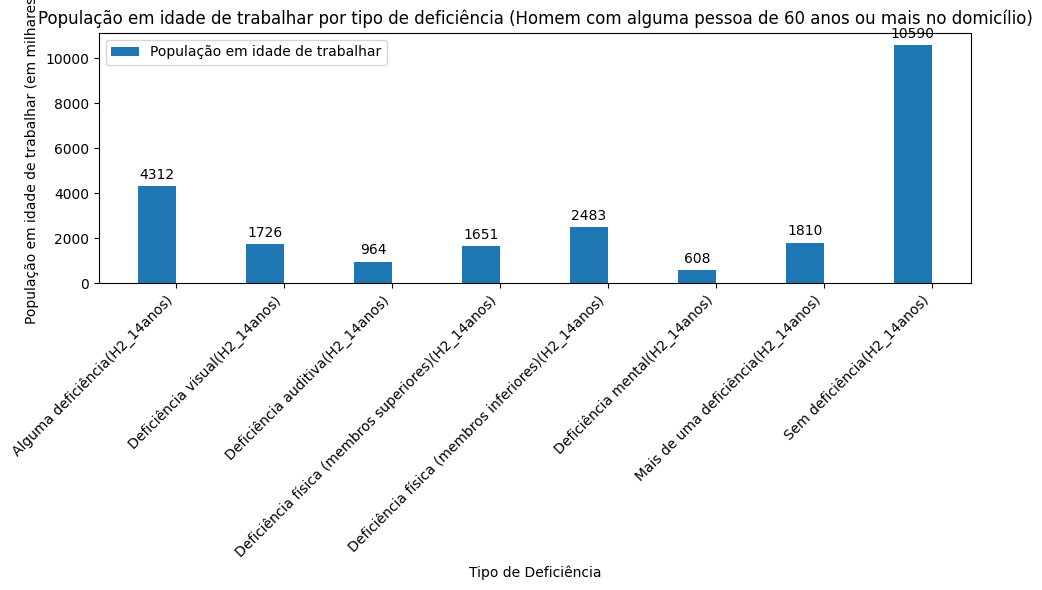

In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
'Deficiência visual(H60Mais)',
'Deficiência auditiva(H60Mais)',
'Deficiência física (membros superiores(H60Mais))',
'Deficiência física (membros inferiores(H60Mais))',
'Deficiência mental(H60Mais)',
'Mais de uma deficiência(H60Mais)',
'Sem deficiência(H60Mais)',]
populacao_idade_trabalhar_3_ = [Alg_deficiencia_3_, deficiencia_Visual_3_, deficiencia_auditiva_3_, deficiencia_fsSup_3_, deficiencia_fsInf_3_, deficiencia_Mental_3_, deficiencia_Mais1_3_, sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_idade_trabalhar_3_, width, label='População em idade de trabalhar')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Homem com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 5. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Visual_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_auditiva_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsSup_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M2_14anos))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsInf_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M2_14anos))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mental_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mais1_4_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
sem_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M2_14anos)', 'População em idade de trabalhar'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_4_ = deficiencia_fsSup_4_ - deficiencia_fsInf_4_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com idade para Trabalhar.".format(Alg_deficiencia_4_))
print("População com deficiência visual: {} com idade para Trabalhar.".format(deficiencia_Visual_4_))
print("População com deficiência auditiva: {} com idade para Trabalhar.".format(deficiencia_auditiva_4_))
print("População com deficiência mental: {} com idade para Trabalhar.".format(deficiencia_Mental_4_))
print("População com mais de uma deficiência: {} com idade para Trabalhar.".format(deficiencia_Mais1_4_))
print("População com deficiência física (membros superiores): {} com idade para Trabalhar.".format(deficiencia_fsSup_4_))
print("População com deficiência física (membros inferiores): {} com idade para Trabalhar.".format(deficiencia_fsInf_4_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_4_)))


População com alguma deficiência: 813 com idade para Trabalhar.
População com deficiência visual: 309 com idade para Trabalhar.
População com deficiência auditiva: 72 com idade para Trabalhar.
População com deficiência mental: 275 com idade para Trabalhar.
População com mais de uma deficiência: 125 com idade para Trabalhar.
População com deficiência física (membros superiores): 214 com idade para Trabalhar.
População com deficiência física (membros inferiores): 152 com idade para Trabalhar.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 62 pessoas.


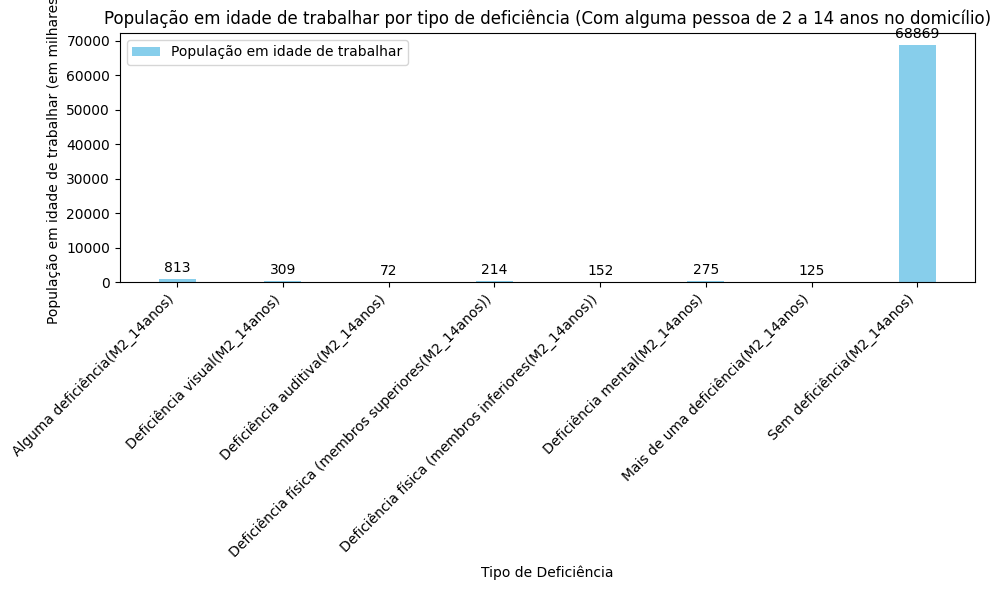

In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M2_14anos)',
'Deficiência visual(M2_14anos)',
'Deficiência auditiva(M2_14anos)',
'Deficiência física (membros superiores(M2_14anos))',
'Deficiência física (membros inferiores(M2_14anos))',
'Deficiência mental(M2_14anos)',
'Mais de uma deficiência(M2_14anos)',
'Sem deficiência(M2_14anos)',]
populacao_idade_trabalhar_4_ = [Alg_deficiencia_4_, deficiencia_Visual_4_, deficiencia_auditiva_4_, deficiencia_fsSup_4_, deficiencia_fsInf_4_, deficiencia_Mental_4_, deficiencia_Mais1_4_, sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_idade_trabalhar_4_, width, label='População em idade de trabalhar', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Com alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

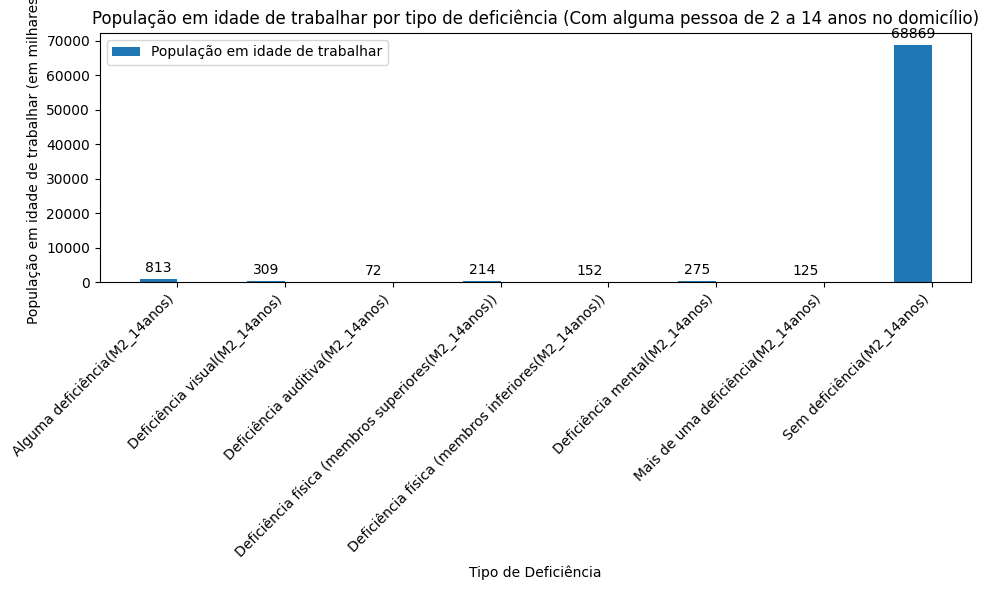

In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M2_14anos)',
'Deficiência visual(M2_14anos)',
'Deficiência auditiva(M2_14anos)',
'Deficiência física (membros superiores(M2_14anos))',
'Deficiência física (membros inferiores(M2_14anos))',
'Deficiência mental(M2_14anos)',
'Mais de uma deficiência(M2_14anos)',
'Sem deficiência(M2_14anos)',]
populacao_idade_trabalhar_4_ = [Alg_deficiencia_4_, deficiencia_Visual_4_, deficiencia_auditiva_4_, deficiencia_fsSup_4_, deficiencia_fsInf_4_, deficiencia_Mental_4_, deficiencia_Mais1_4_, sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_idade_trabalhar_4_, width, label='População em idade de trabalhar')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Com alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 6. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Visual_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_auditiva_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsSup_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M60Mais))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsInf_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M60Mais))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mental_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mais1_5_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
sem_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_5_ = deficiencia_fsSup_5_ - deficiencia_fsInf_5_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com idade para Trabalhar.".format(Alg_deficiencia_5_))
print("População com deficiência visual: {} com idade para Trabalhar.".format(deficiencia_Visual_5_))
print("População com deficiência auditiva: {} com idade para Trabalhar.".format(deficiencia_auditiva_5_))
print("População com deficiência mental: {} com idade para Trabalhar.".format(deficiencia_Mental_5_))
print("População com mais de uma deficiência: {} com idade para Trabalhar.".format(deficiencia_Mais1_5_))
print("População com deficiência física (membros superiores): {} com idade para Trabalhar.".format(deficiencia_fsSup_5_))
print("População com deficiência física (membros inferiores): {} com idade para Trabalhar.".format(deficiencia_fsInf_5_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_5_)))


População com alguma deficiência: 6816 com idade para Trabalhar.
População com deficiência visual: 2609 com idade para Trabalhar.
População com deficiência auditiva: 1262 com idade para Trabalhar.
População com deficiência mental: 958 com idade para Trabalhar.
População com mais de uma deficiência: 3120 com idade para Trabalhar.
População com deficiência física (membros superiores): 2924 com idade para Trabalhar.
População com deficiência física (membros inferiores): 4310 com idade para Trabalhar.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 1386 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_5_= ['Alguma deficiência(M60Mais)',
'Deficiência visual(M60Mais)',
'Deficiência auditiva(M60Mais)',
'Deficiência física (membros superiores(M60Mais))',
'Deficiência física (membros inferiores(M60Mais))',
'Deficiência mental(M60Mais)',
'Mais de uma deficiência(M60Mais)',
'Sem deficiência(M60Mais)',]
populacao_idade_trabalhar_5_ = [Alg_deficiencia_5_, deficiencia_Visual_5_, deficiencia_auditiva_5_, deficiencia_fsSup_5_, deficiencia_fsInf_5_, deficiencia_Mental_5_, deficiencia_Mais1_5_, sem_deficiencia_5_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_5_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_idade_trabalhar_5_, width, label='População em idade de trabalhar', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_5_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

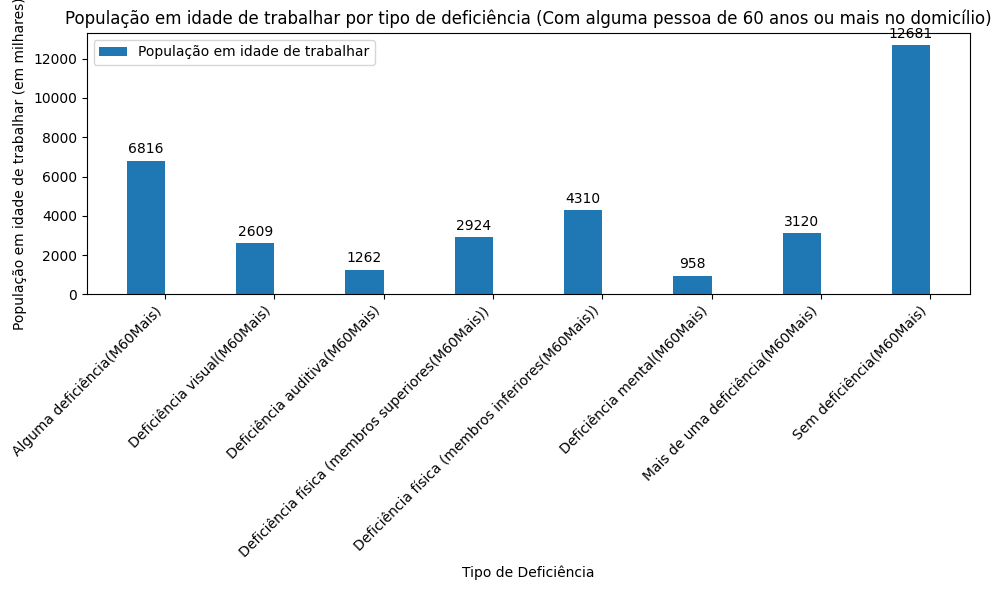

In [ ]:
# Definindo os dados
tipos_deficiencia_5_= ['Alguma deficiência(M60Mais)',
'Deficiência visual(M60Mais)',
'Deficiência auditiva(M60Mais)',
'Deficiência física (membros superiores(M60Mais))',
'Deficiência física (membros inferiores(M60Mais))',
'Deficiência mental(M60Mais)',
'Mais de uma deficiência(M60Mais)',
'Sem deficiência(M60Mais)',]
populacao_idade_trabalhar_5_ = [Alg_deficiencia_5_, deficiencia_Visual_5_, deficiencia_auditiva_5_, deficiencia_fsSup_5_, deficiencia_fsInf_5_, deficiencia_Mental_5_, deficiencia_Mais1_5_, sem_deficiencia_5_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_5_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_idade_trabalhar_5_, width, label='População em idade de trabalhar')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em idade de trabalhar (em milhares)')
ax.set_title('População em idade de trabalhar por tipo de deficiência (Com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_5_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#**População na força de trabalho [unidades de milhar]**

#####1. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 2 a 14 anos no domicílio**

In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Visual = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_auditiva = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsSup = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(2_14anos))', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsInf = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(2_14anos))', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mental = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mais1 = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
sem_deficiencia = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica = deficiencia_fsSup - deficiencia_fsInf

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} na força de trabalho.".format(Alg_deficiencia))
print("População com deficiência visual: {} na força de trabalho.".format(deficiencia_Visual))
print("População com deficiência auditiva: {} na força de trabalho.".format(deficiencia_auditiva))
print("População com deficiência mental: {} na força de trabalho.".format(deficiencia_Mental))
print("População com mais de uma deficiência: {} na força de trabalho.".format(deficiencia_Mais1))
print("População com deficiência física (membros superiores): {} na força de trabalho.".format(deficiencia_fsSup))
print("População com deficiência física (membros inferiores): {} na força de trabalho.".format(deficiencia_fsInf))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica)))

População com alguma deficiência: 940 na força de trabalho.
População com deficiência visual: 365 na força de trabalho.
População com deficiência auditiva: 100 na força de trabalho.
População com deficiência mental: 272 na força de trabalho.
População com mais de uma deficiência: 129 na força de trabalho.
População com deficiência física (membros superiores): 248 na força de trabalho.
População com deficiência física (membros inferiores): 169 na força de trabalho.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 79 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_na_forca_trabalho = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(tipos_deficiencia, populacao_na_forca_trabalho, color='skyblue')
plt.xlabel('População na força de trabalho (em milhares)')
plt.ylabel('Tipo de Deficiência')
plt.title('População na força de trabalho por tipo de deficiência (Com alguma pessoa de 2 a 14 anos no domicílio)')
plt.gca().invert_yaxis()  # Inverter os eixos para que a deficiência mais comum seja exibida no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_na_forca_trabalho = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_na_forca_trabalho, width, label='População na força de trabalho')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Com alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####2. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 60 anos ou mais no domicílio**

In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_1_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(60ouMais)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Visual_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(60ouMais)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_auditiva_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(60ouMais)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsSup_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(60ouMais))', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsInf_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(60ouMais))', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mental_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(60ouMais)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mais1_1_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(60ouMais)', 'População na força de trabalho'].values[0].replace(" ", ""))
sem_deficiencia_1_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(60ouMais)', 'População na força de trabalho'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = deficiencia_fsSup_1_ - deficiencia_fsInf_1_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} na força de trabalho.".format(Alg_deficiencia_1_))
print("População com deficiência visual: {} na força de trabalho.".format(deficiencia_Visual_1_))
print("População com deficiência auditiva: {} na força de trabalho.".format(deficiencia_auditiva_1_))
print("População com deficiência mental: {} na força de trabalho.".format(deficiencia_Mental_1_))
print("População com mais de uma deficiência: {} na força de trabalho.".format(deficiencia_Mais1_1_))
print("População com deficiência física (membros superiores): {} na força de trabalho.".format(deficiencia_fsSup_1_))
print("População com deficiência física (membros inferiores): {} na força de trabalho.".format(deficiencia_fsInf_1_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_1_)))


População com alguma deficiência: 1577 na força de trabalho.
População com deficiência visual: 626 na força de trabalho.
População com deficiência auditiva: 306 na força de trabalho.
População com deficiência mental: 167 na força de trabalho.
População com mais de uma deficiência: 537 na força de trabalho.
População com deficiência física (membros superiores): 551 na força de trabalho.
População com deficiência física (membros inferiores): 827 na força de trabalho.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 276 pessoas.


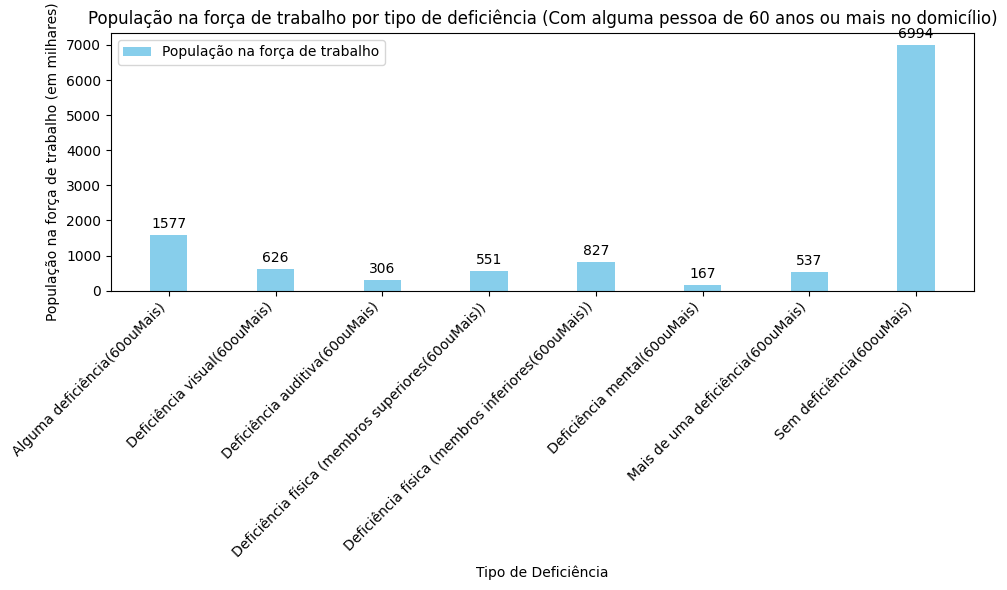

In [ ]:
# Definindo os dados
tipos_deficiencia_1_ = ['Alguma deficiência(60ouMais)',
                        'Deficiência visual(60ouMais)',
                        'Deficiência auditiva(60ouMais)',
                        'Deficiência física (membros superiores(60ouMais))',
                        'Deficiência física (membros inferiores(60ouMais))',
                        'Deficiência mental(60ouMais)',
                        'Mais de uma deficiência(60ouMais)',
                        'Sem deficiência(60ouMais)']

populacao_na_forca_trabalho_1_ = [Alg_deficiencia_1_,
                                   deficiencia_Visual_1_,
                                   deficiencia_auditiva_1_,
                                   deficiencia_fsSup_1_,
                                   deficiencia_fsInf_1_,
                                   deficiencia_Mental_1_,
                                   deficiencia_Mais1_1_,
                                   sem_deficiencia_1_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_1_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_na_forca_trabalho_1_, width, label='População na força de trabalho', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_1_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

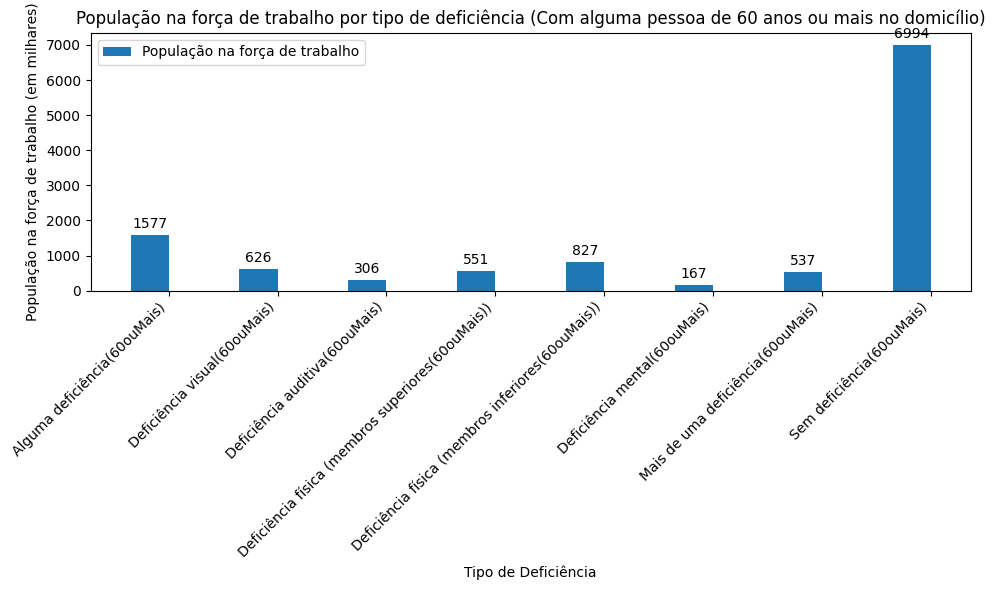

In [ ]:
# Definindo os dados
tipos_deficiencia_1_ = ['Alguma deficiência(60ouMais)',
                        'Deficiência visual(60ouMais)',
                        'Deficiência auditiva(60ouMais)',
                        'Deficiência física (membros superiores(60ouMais))',
                        'Deficiência física (membros inferiores(60ouMais))',
                        'Deficiência mental(60ouMais)',
                        'Mais de uma deficiência(60ouMais)',
                        'Sem deficiência(60ouMais)']

populacao_na_forca_trabalho_1_ = [Alg_deficiencia_1_,
                                   deficiencia_Visual_1_,
                                   deficiencia_auditiva_1_,
                                   deficiencia_fsSup_1_,
                                   deficiencia_fsInf_1_,
                                   deficiencia_Mental_1_,
                                   deficiencia_Mais1_1_,
                                   sem_deficiencia_1_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_1_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_na_forca_trabalho_1_, width, label='População na força de trabalho')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_1_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####3. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem om alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_2_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Visual_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(H2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_auditiva_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsSup_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores)(H2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsInf_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores)(H2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mental_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(H2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mais1_2_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
sem_deficiencia_2_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(H2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_2_ = deficiencia_fsSup_2_ - deficiencia_fsInf_2_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} na força de trabalho.".format(Alg_deficiencia_2_))
print("População com deficiência visual: {} na força de trabalho.".format(deficiencia_Visual_2_))
print("População com deficiência auditiva: {} na força de trabalho.".format(deficiencia_auditiva_2_))
print("População com deficiência mental: {} na força de trabalho.".format(deficiencia_Mental_2_))
print("População com mais de uma deficiência: {} na força de trabalho.".format(deficiencia_Mais1_2_))
print("População com deficiência física (membros superiores): {} na força de trabalho.".format(deficiencia_fsSup_2_))
print("População com deficiência física (membros inferiores): {} na força de trabalho.".format(deficiencia_fsInf_2_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_2_)))

População com alguma deficiência: 509 na força de trabalho.
População com deficiência visual: 202 na força de trabalho.
População com deficiência auditiva: 46 na força de trabalho.
População com deficiência mental: 152 na força de trabalho.
População com mais de uma deficiência: 73 na força de trabalho.
População com deficiência física (membros superiores): 131 na força de trabalho.
População com deficiência física (membros inferiores): 100 na força de trabalho.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 31 pessoas.


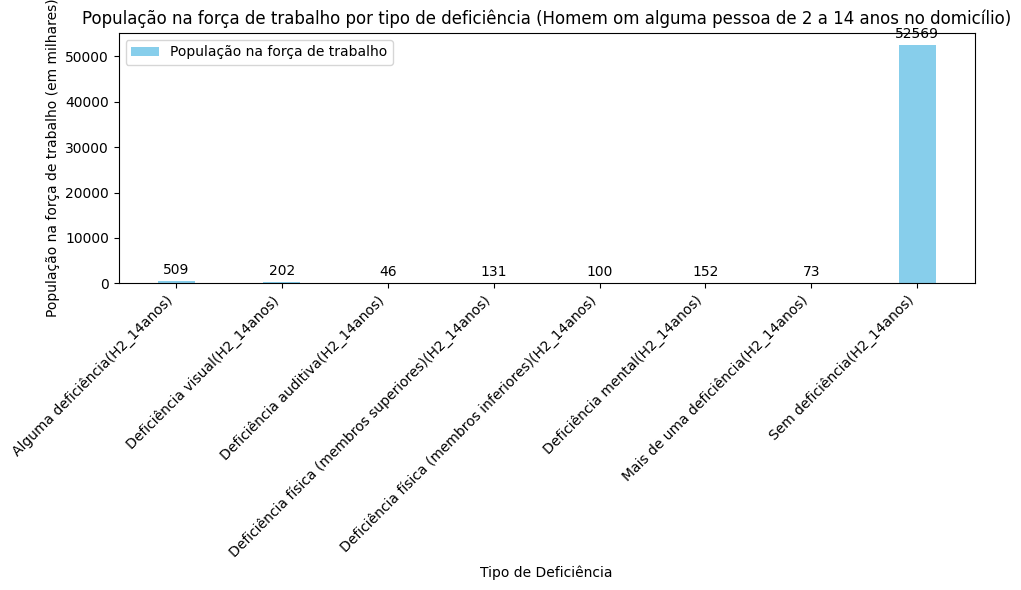

In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
                       'Deficiência visual(H2_14anos)',
                       'Deficiência auditiva(H2_14anos)',
                       'Deficiência física (membros superiores)(H2_14anos)',
                       'Deficiência física (membros inferiores)(H2_14anos)',
                       'Deficiência mental(H2_14anos)',
                       'Mais de uma deficiência(H2_14anos)',
                       'Sem deficiência(H2_14anos)']

populacao_na_forca_trabalho_2_ = [Alg_deficiencia_2_,
                                   deficiencia_Visual_2_,
                                   deficiencia_auditiva_2_,
                                   deficiencia_fsSup_2_,
                                   deficiencia_fsInf_2_,
                                   deficiencia_Mental_2_,
                                   deficiencia_Mais1_2_,
                                   sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_na_forca_trabalho_2_, width, label='População na força de trabalho', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Homem om alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

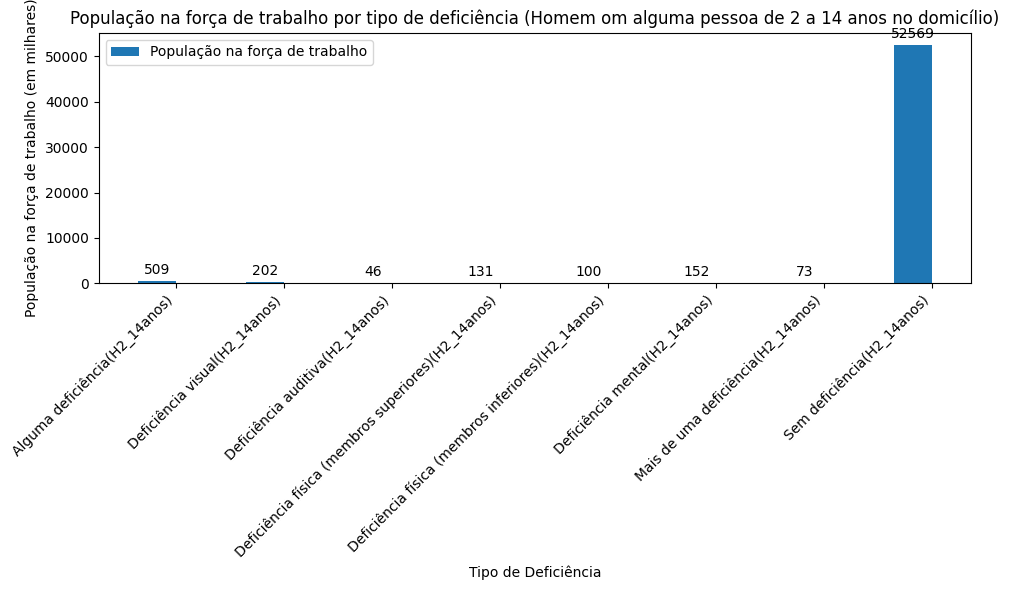

In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
                       'Deficiência visual(H2_14anos)',
                       'Deficiência auditiva(H2_14anos)',
                       'Deficiência física (membros superiores)(H2_14anos)',
                       'Deficiência física (membros inferiores)(H2_14anos)',
                       'Deficiência mental(H2_14anos)',
                       'Mais de uma deficiência(H2_14anos)',
                       'Sem deficiência(H2_14anos)']

populacao_na_forca_trabalho_2_ = [Alg_deficiencia_2_,
                                   deficiencia_Visual_2_,
                                   deficiencia_auditiva_2_,
                                   deficiencia_fsSup_2_,
                                   deficiencia_fsInf_2_,
                                   deficiencia_Mental_2_,
                                   deficiencia_Mais1_2_,
                                   sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_na_forca_trabalho_2_, width, label='População na força de trabalho')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Homem om alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####4. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem om alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_3_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H60Mais)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Visual_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(H60Mais)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_auditiva_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H60Mais)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsSup_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(H60Mais))', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsInf_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(H60Mais))', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mental_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(H60Mais)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mais1_3_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H60Mais)', 'População na força de trabalho'].values[0].replace(" ", ""))
sem_deficiencia_3_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(H60Mais)', 'População na força de trabalho'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_3_ = deficiencia_fsSup_3_ - deficiencia_fsInf_3_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} na força de trabalho.".format(Alg_deficiencia_3_))
print("População com deficiência visual: {} na força de trabalho.".format(deficiencia_Visual_3_))
print("População com deficiência auditiva: {} na força de trabalho.".format(deficiencia_auditiva_3_))
print("População com deficiência mental: {} na força de trabalho.".format(deficiencia_Mental_3_))
print("População com mais de uma deficiência: {} na força de trabalho.".format(deficiencia_Mais1_3_))
print("População com deficiência física (membros superiores): {} na força de trabalho.".format(deficiencia_fsSup_3_))
print("População com deficiência física (membros inferiores): {} na força de trabalho.".format(deficiencia_fsInf_3_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_3_)))

População com alguma deficiência: 904 na força de trabalho.
População com deficiência visual: 354 na força de trabalho.
População com deficiência auditiva: 192 na força de trabalho.
População com deficiência mental: 89 na força de trabalho.
População com mais de uma deficiência: 307 na força de trabalho.
População com deficiência física (membros superiores): 295 na força de trabalho.
População com deficiência física (membros inferiores): 455 na força de trabalho.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 160 pessoas.


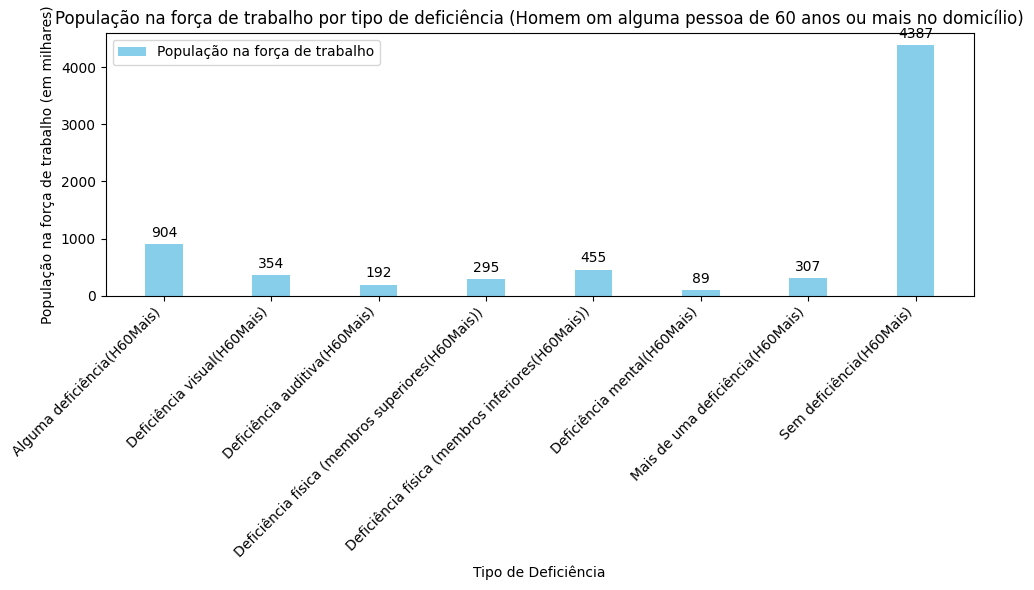

In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
                       'Deficiência visual(H60Mais)',
                       'Deficiência auditiva(H60Mais)',
                       'Deficiência física (membros superiores(H60Mais))',
                       'Deficiência física (membros inferiores(H60Mais))',
                       'Deficiência mental(H60Mais)',
                       'Mais de uma deficiência(H60Mais)',
                       'Sem deficiência(H60Mais)']

populacao_na_forca_trabalho_3_ = [Alg_deficiencia_3_,
                                   deficiencia_Visual_3_,
                                   deficiencia_auditiva_3_,
                                   deficiencia_fsSup_3_,
                                   deficiencia_fsInf_3_,
                                   deficiencia_Mental_3_,
                                   deficiencia_Mais1_3_,
                                   sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_na_forca_trabalho_3_, width, label='População na força de trabalho', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Homem om alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_3_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


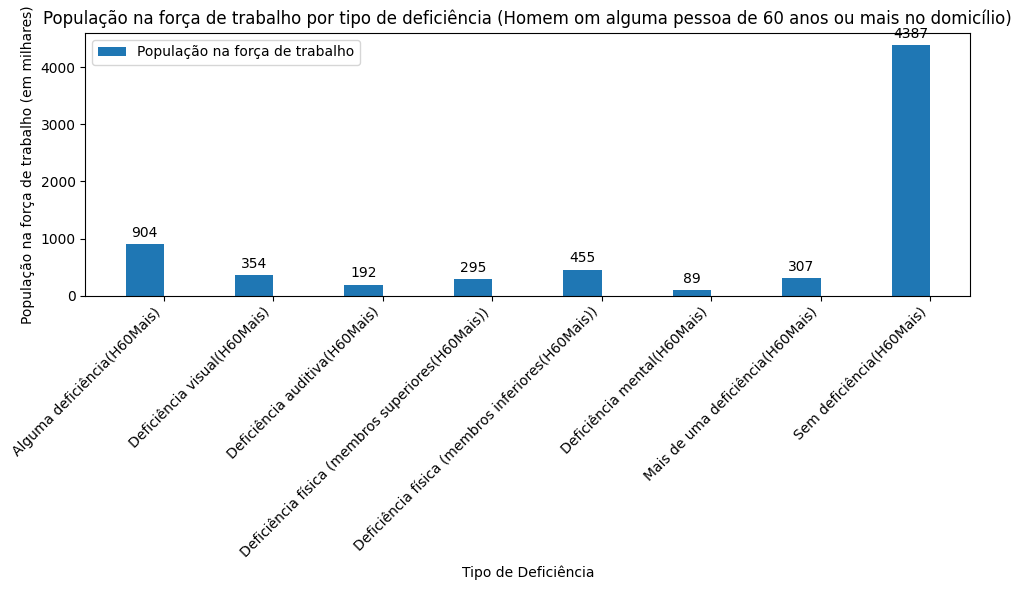

In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
                       'Deficiência visual(H60Mais)',
                       'Deficiência auditiva(H60Mais)',
                       'Deficiência física (membros superiores(H60Mais))',
                       'Deficiência física (membros inferiores(H60Mais))',
                       'Deficiência mental(H60Mais)',
                       'Mais de uma deficiência(H60Mais)',
                       'Sem deficiência(H60Mais)']

populacao_na_forca_trabalho_3_ = [Alg_deficiencia_3_,
                                   deficiencia_Visual_3_,
                                   deficiencia_auditiva_3_,
                                   deficiencia_fsSup_3_,
                                   deficiencia_fsInf_3_,
                                   deficiencia_Mental_3_,
                                   deficiencia_Mais1_3_,
                                   sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_na_forca_trabalho_3_, width, label='População na força de trabalho')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Homem om alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_3_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####5. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Visual_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_auditiva_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsSup_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M2_14anos))', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_fsInf_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M2_14anos))', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mental_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
deficiencia_Mais1_4_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))
sem_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M2_14anos)', 'População na força de trabalho'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_4_ = deficiencia_fsSup_4_ - deficiencia_fsInf_4_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} na força de trabalho.".format(Alg_deficiencia_4_))
print("População com deficiência visual: {} na força de trabalho.".format(deficiencia_Visual_4_))
print("População com deficiência auditiva: {} na força de trabalho.".format(deficiencia_auditiva_4_))
print("População com deficiência mental: {} na força de trabalho.".format(deficiencia_Mental_4_))
print("População com mais de uma deficiência: {} na força de trabalho.".format(deficiencia_Mais1_4_))
print("População com deficiência física (membros superiores): {} na força de trabalho.".format(deficiencia_fsSup_4_))
print("População com deficiência física (membros inferiores): {} na força de trabalho.".format(deficiencia_fsInf_4_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_4_)))

População com alguma deficiência: 431 na força de trabalho.
População com deficiência visual: 163 na força de trabalho.
População com deficiência auditiva: 53 na força de trabalho.
População com deficiência mental: 120 na força de trabalho.
População com mais de uma deficiência: 56 na força de trabalho.
População com deficiência física (membros superiores): 117 na força de trabalho.
População com deficiência física (membros inferiores): 69 na força de trabalho.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 48 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M2_14anos)',
                       'Deficiência visual(M2_14anos)',
                       'Deficiência auditiva(M2_14anos)',
                       'Deficiência física (membros superiores(M2_14anos))',
                       'Deficiência física (membros inferiores(M2_14anos))',
                       'Deficiência mental(M2_14anos)',
                       'Mais de uma deficiência(M2_14anos)',
                       'Sem deficiência(M2_14anos)']

populacao_na_forca_trabalho_4_ = [Alg_deficiencia_4_,
                                   deficiencia_Visual_4_,
                                   deficiencia_auditiva_4_,
                                   deficiencia_fsSup_4_,
                                   deficiencia_fsInf_4_,
                                   deficiencia_Mental_4_,
                                   deficiencia_Mais1_4_,
                                   sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_na_forca_trabalho_4_, width, label='População na força de trabalho', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Com alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

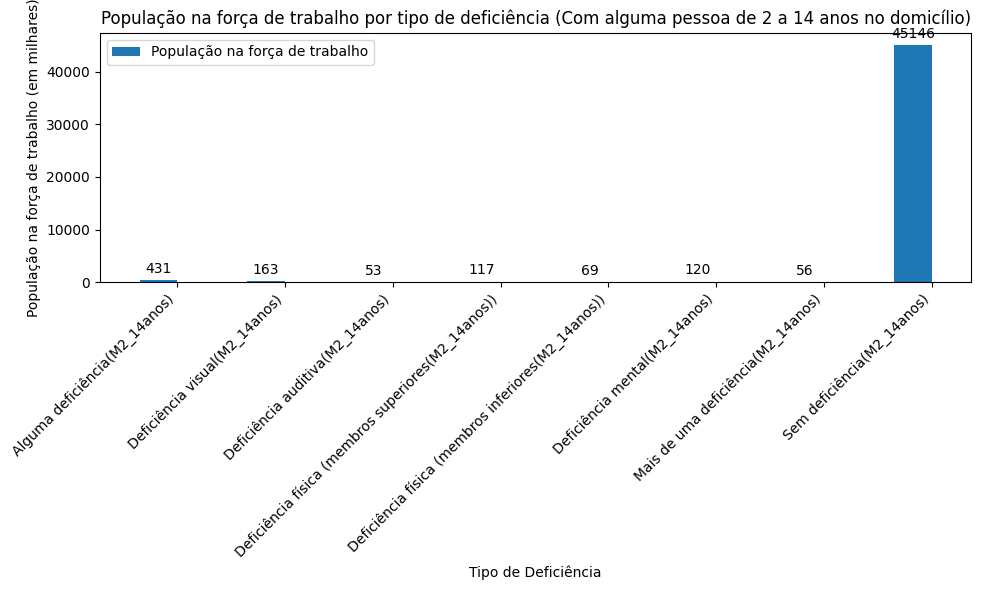

In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M2_14anos)',
                       'Deficiência visual(M2_14anos)',
                       'Deficiência auditiva(M2_14anos)',
                       'Deficiência física (membros superiores(M2_14anos))',
                       'Deficiência física (membros inferiores(M2_14anos))',
                       'Deficiência mental(M2_14anos)',
                       'Mais de uma deficiência(M2_14anos)',
                       'Sem deficiência(M2_14anos)']

populacao_na_forca_trabalho_4_ = [Alg_deficiencia_4_,
                                   deficiencia_Visual_4_,
                                   deficiencia_auditiva_4_,
                                   deficiencia_fsSup_4_,
                                   deficiencia_fsInf_4_,
                                   deficiencia_Mental_4_,
                                   deficiencia_Mais1_4_,
                                   sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_na_forca_trabalho_4_, width, label='População na força de trabalho')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Com alguma pessoa de 2 a 14 anos no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####6. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Visual_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_auditiva_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsSup_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M60Mais))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_fsInf_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M60Mais))', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mental_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
deficiencia_Mais1_5_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))
sem_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M60Mais)', 'População em idade de trabalhar'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_5_ = deficiencia_fsSup_5_ - deficiencia_fsInf_5_

# Exibindo os valores e a diferença numérica
print("População na força de trabalho com alguma deficiência: {}.".format(Alg_deficiencia_5_))
print("População na força de trabalho com deficiência visual: {}.".format(deficiencia_Visual_5_))
print("População na força de trabalho com deficiência auditiva: {}.".format(deficiencia_auditiva_5_))
print("População na força de trabalho com deficiência mental: {}.".format(deficiencia_Mental_5_))
print("População na força de trabalho com mais de uma deficiência: {}.".format(deficiencia_Mais1_5_))
print("População na força de trabalho com deficiência física (membros superiores): {}.".format(deficiencia_fsSup_5_))
print("População na força de trabalho com deficiência física (membros inferiores): {}.".format(deficiencia_fsInf_5_))

print("A diferença numérica entre pessoas na força de trabalho com deficiência física superior e inferior é de {}.".format(abs(diferenca_numerica_fisica_5_)))

População na força de trabalho com alguma deficiência: 6816.
População na força de trabalho com deficiência visual: 2609.
População na força de trabalho com deficiência auditiva: 1262.
População na força de trabalho com deficiência mental: 958.
População na força de trabalho com mais de uma deficiência: 3120.
População na força de trabalho com deficiência física (membros superiores): 2924.
População na força de trabalho com deficiência física (membros inferiores): 4310.
A diferença numérica entre pessoas na força de trabalho com deficiência física superior e inferior é de 1386.


In [ ]:
# Definindo os dados
tipos_deficiencia_5_ = ['Alguma deficiência(M60Mais)',
                        'Deficiência visual(M60Mais)',
                        'Deficiência auditiva(M60Mais)',
                        'Deficiência física (membros superiores(M60Mais))',
                        'Deficiência física (membros inferiores(M60Mais))',
                        'Deficiência mental(M60Mais)',
                        'Mais de uma deficiência(M60Mais)',
                        'Sem deficiência(M60Mais)']

populacao_na_forca_trabalho_5_ = [Alg_deficiencia_5_,
                                  deficiencia_Visual_5_,
                                  deficiencia_auditiva_5_,
                                  deficiencia_fsSup_5_,
                                  deficiencia_fsInf_5_,
                                  deficiencia_Mental_5_,
                                  deficiencia_Mais1_5_,
                                  sem_deficiencia_5_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_5_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_na_forca_trabalho_5_, width, label='População na força de trabalho', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_5_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

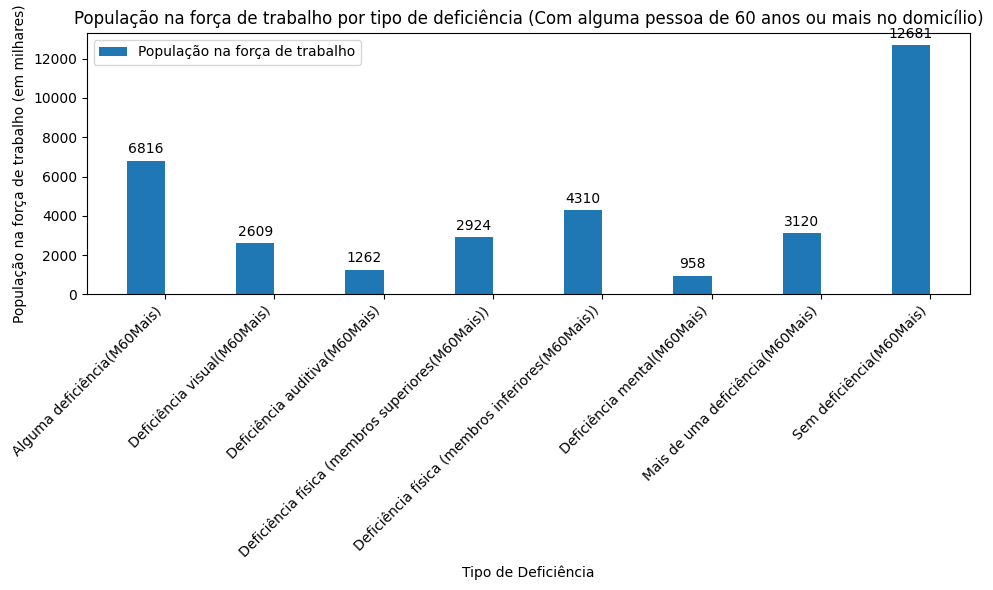

In [ ]:
# Definindo os dados
tipos_deficiencia_5_= ['Alguma deficiência(M60Mais)',
                       'Deficiência visual(M60Mais)',
                       'Deficiência auditiva(M60Mais)',
                       'Deficiência física (membros superiores(M60Mais))',
                       'Deficiência física (membros inferiores(M60Mais))',
                       'Deficiência mental(M60Mais)',
                       'Mais de uma deficiência(M60Mais)',
                       'Sem deficiência(M60Mais)']
populacao_na_forca_trabalho_5_ = [Alg_deficiencia_5_,
                                  deficiencia_Visual_5_,
                                  deficiencia_auditiva_5_,
                                  deficiencia_fsSup_5_,
                                  deficiencia_fsInf_5_,
                                  deficiencia_Mental_5_,
                                  deficiencia_Mais1_5_,
                                  sem_deficiencia_5_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_5_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_na_forca_trabalho_5_, width, label='População na força de trabalho')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência (Com alguma pessoa de 60 anos ou mais no domicílio)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_5_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


#**População Ocupada [unidades de milhar]**

#####1. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 2 a 14 anos no domicílio**

In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Visual = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_auditiva = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsSup = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(2_14anos))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsInf = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(2_14anos))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mental = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mais1 = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
sem_deficiencia = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica = deficiencia_fsSup - deficiencia_fsInf

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} ocupada.".format(Alg_deficiencia))
print("População com deficiência visual: {} ocupada.".format(deficiencia_Visual))
print("População com deficiência auditiva: {} ocupada.".format(deficiencia_auditiva))
print("População com deficiência mental: {} ocupada.".format(deficiencia_Mental))
print("População com mais de uma deficiência: {} ocupada.".format(deficiencia_Mais1))
print("População com deficiência física (membros superiores): {} ocupada.".format(deficiencia_fsSup))
print("População com deficiência física (membros inferiores): {} ocupada.".format(deficiencia_fsInf))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica)))


População com alguma deficiência: 816 ocupada.
População com deficiência visual: 310 ocupada.
População com deficiência auditiva: 94 ocupada.
População com deficiência mental: 234 ocupada.
População com mais de uma deficiência: 115 ocupada.
População com deficiência física (membros superiores): 220 ocupada.
População com deficiência física (membros inferiores): 154 ocupada.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 66 pessoas.


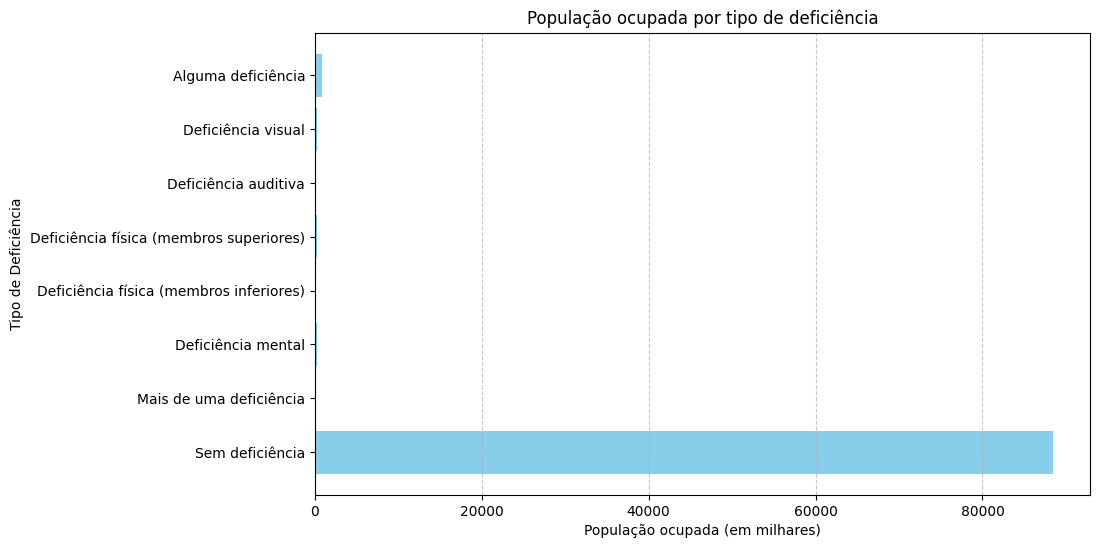

In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_ocupada = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(tipos_deficiencia, populacao_ocupada, color='skyblue')
plt.xlabel('População ocupada (em milhares)')
plt.ylabel('Tipo de Deficiência')
plt.title('População ocupada por tipo de deficiência')
plt.gca().invert_yaxis()  # Inverter os eixos para que a deficiência mais comum seja exibida no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

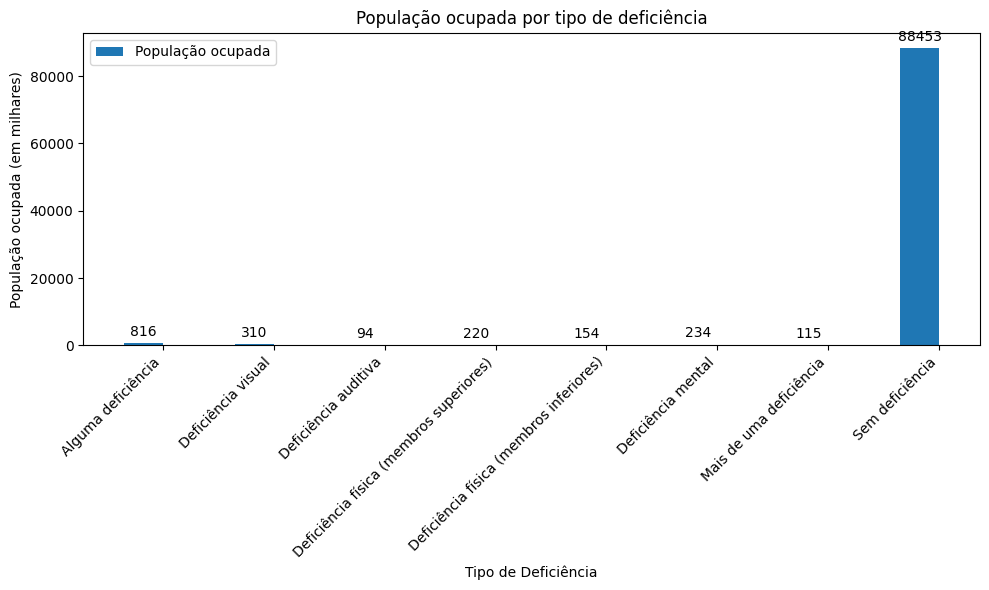

In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_ocupada = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_ocupada, width, label='População ocupada')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada (em milhares)')
ax.set_title('População ocupada por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####2. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 60 anos ou mais no domicílio**

In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_1_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(60ouMais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Visual_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(60ouMais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_auditiva_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(60ouMais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsSup_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(60ouMais))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsInf_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(60ouMais))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mental_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(60ouMais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mais1_1_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(60ouMais)', 'População ocupada\n'].values[0].replace(" ", ""))
sem_deficiencia_1_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(60ouMais)', 'População ocupada\n'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = deficiencia_fsSup_1_ - deficiencia_fsInf_1_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} ocupada.".format(Alg_deficiencia_1_))
print("População com deficiência visual: {} ocupada.".format(deficiencia_Visual_1_))
print("População com deficiência auditiva: {} ocupada.".format(deficiencia_auditiva_1_))
print("População com deficiência mental: {} ocupada.".format(deficiencia_Mental_1_))
print("População com mais de uma deficiência: {} ocupada.".format(deficiencia_Mais1_1_))
print("População com deficiência física (membros superiores): {} ocupada.".format(deficiencia_fsSup_1_))
print("População com deficiência física (membros inferiores): {} ocupada.".format(deficiencia_fsInf_1_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_1_)))


População com alguma deficiência: 1507 ocupada.
População com deficiência visual: 593 ocupada.
População com deficiência auditiva: 287 ocupada.
População com deficiência mental: 162 ocupada.
População com mais de uma deficiência: 504 ocupada.
População com deficiência física (membros superiores): 518 ocupada.
População com deficiência física (membros inferiores): 787 ocupada.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 269 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_1_ = ['Alguma deficiência(60ouMais)',
                        'Deficiência visual(60ouMais)',
                        'Deficiência auditiva(60ouMais)',
                        'Deficiência física (membros superiores(60ouMais))',
                        'Deficiência física (membros inferiores(60ouMais))',
                        'Deficiência mental(60ouMais)',
                        'Mais de uma deficiência(60ouMais)',
                        'Sem deficiência(60ouMais)']
populacao_ocupada_1_ = [Alg_deficiencia_1_, deficiencia_Visual_1_, deficiencia_auditiva_1_, deficiencia_fsSup_1_, deficiencia_fsInf_1_, deficiencia_Mental_1_, deficiencia_Mais1_1_, sem_deficiencia_1_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_1_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_ocupada_1_, width, label='População ocupada', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada (em milhares)')
ax.set_title('População ocupada por tipo de deficiência (60 anos ou mais)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_1_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Definindo os dados
tipos_deficiencia_1_ = ['Alguma deficiência(60ouMais)',
                        'Deficiência visual(60ouMais)',
                        'Deficiência auditiva(60ouMais)',
                        'Deficiência física (membros superiores(60ouMais))',
                        'Deficiência física (membros inferiores(60ouMais))',
                        'Deficiência mental(60ouMais)',
                        'Mais de uma deficiência(60ouMais)',
                        'Sem deficiência(60ouMais)']
populacao_ocupada_1_ = [Alg_deficiencia_1_, deficiencia_Visual_1_, deficiencia_auditiva_1_, deficiencia_fsSup_1_, deficiencia_fsInf_1_, deficiencia_Mental_1_, deficiencia_Mais1_1_, sem_deficiencia_1_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_1_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_ocupada_1_, width, label='População ocupada', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada (em milhares)')
ax.set_title('População ocupada por tipo de deficiência (60 anos ou mais)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_1_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 3. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem om alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_2_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Visual_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(H2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_auditiva_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsSup_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores)(H2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsInf_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores)(H2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mental_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(H2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mais1_2_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
sem_deficiencia_2_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(H2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_2_ = deficiencia_fsSup_2_ - deficiencia_fsInf_2_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} ocupada.".format(Alg_deficiencia_2_))
print("População com deficiência visual: {} ocupada.".format(deficiencia_Visual_2_))
print("População com deficiência auditiva: {} ocupada.".format(deficiencia_auditiva_2_))
print("População com deficiência mental: {} ocupada.".format(deficiencia_Mental_2_))
print("População com mais de uma deficiência: {} ocupada.".format(deficiencia_Mais1_2_))
print("População com deficiência física (membros superiores): {} ocupada.".format(deficiencia_fsSup_2_))
print("População com deficiência física (membros inferiores): {} ocupada.".format(deficiencia_fsInf_2_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_2_)))


População com alguma deficiência: 454 ocupada.
População com deficiência visual: 176 ocupada.
População com deficiência auditiva: 43 ocupada.
População com deficiência mental: 136 ocupada.
População com mais de uma deficiência: 67 ocupada.
População com deficiência física (membros superiores): 120 ocupada.
População com deficiência física (membros inferiores): 92 ocupada.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 28 pessoas.


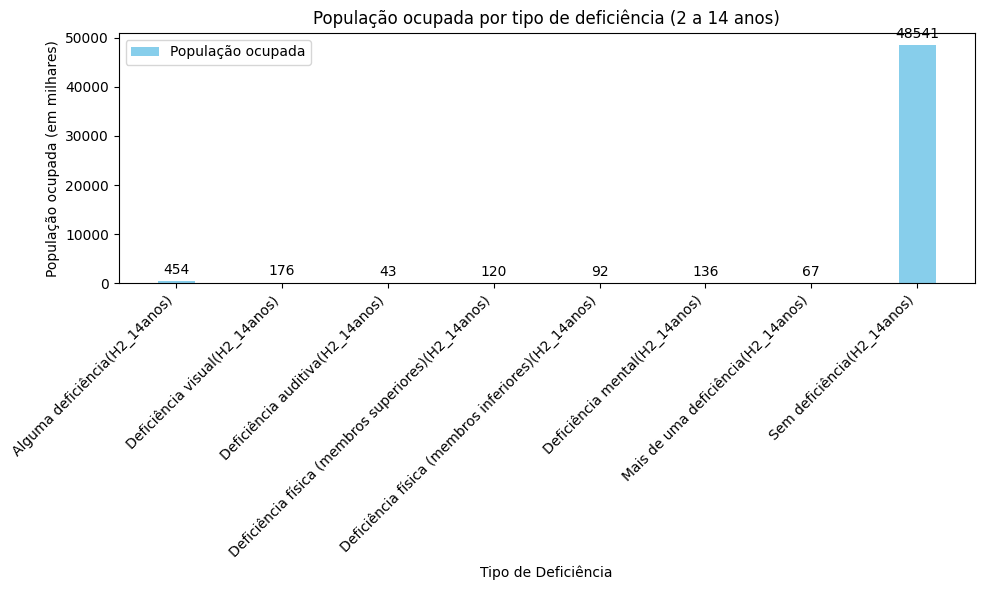

In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
                       'Deficiência visual(H2_14anos)',
                       'Deficiência auditiva(H2_14anos)',
                       'Deficiência física (membros superiores)(H2_14anos)',
                       'Deficiência física (membros inferiores)(H2_14anos)',
                       'Deficiência mental(H2_14anos)',
                       'Mais de uma deficiência(H2_14anos)',
                       'Sem deficiência(H2_14anos)']

populacao_ocupada_2_ = [Alg_deficiencia_2_,
                        deficiencia_Visual_2_,
                        deficiencia_auditiva_2_,
                        deficiencia_fsSup_2_,
                        deficiencia_fsInf_2_,
                        deficiencia_Mental_2_,
                        deficiencia_Mais1_2_,
                        sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_ocupada_2_, width, label='População ocupada', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada (em milhares)')
ax.set_title('População ocupada por tipo de deficiência (2 a 14 anos)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

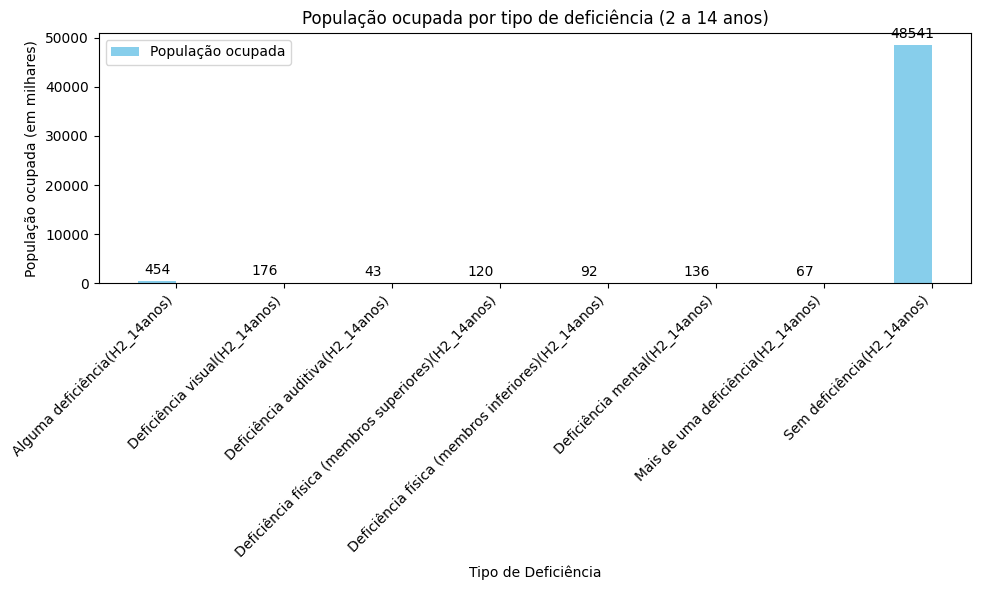

In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
                       'Deficiência visual(H2_14anos)',
                       'Deficiência auditiva(H2_14anos)',
                       'Deficiência física (membros superiores)(H2_14anos)',
                       'Deficiência física (membros inferiores)(H2_14anos)',
                       'Deficiência mental(H2_14anos)',
                       'Mais de uma deficiência(H2_14anos)',
                       'Sem deficiência(H2_14anos)']

populacao_ocupada_2_ = [Alg_deficiencia_2_,
                        deficiencia_Visual_2_,
                        deficiencia_auditiva_2_,
                        deficiencia_fsSup_2_,
                        deficiencia_fsInf_2_,
                        deficiencia_Mental_2_,
                        deficiencia_Mais1_2_,
                        sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_ocupada_2_, width, label='População ocupada', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada (em milhares)')
ax.set_title('População ocupada por tipo de deficiência (2 a 14 anos)')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 4. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem om alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_3_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Visual_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(H60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_auditiva_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsSup_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(H60Mais))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsInf_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(H60Mais))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mental_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(H60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mais1_3_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
sem_deficiencia_3_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(H60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_3_ = deficiencia_fsSup_3_ - deficiencia_fsInf_3_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} ocupada.".format(Alg_deficiencia_3_))
print("População com deficiência visual: {} ocupada.".format(deficiencia_Visual_3_))
print("População com deficiência auditiva: {} ocupada.".format(deficiencia_auditiva_3_))
print("População com deficiência mental: {} ocupada.".format(deficiencia_Mental_3_))
print("População com mais de uma deficiência: {} ocupada.".format(deficiencia_Mais1_3_))
print("População com deficiência física (membros superiores): {} ocupada.".format(deficiencia_fsSup_3_))
print("População com deficiência física (membros inferiores): {} ocupada.".format(deficiencia_fsInf_3_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_3_)))

População com alguma deficiência: 866 ocupada.
População com deficiência visual: 340 ocupada.
População com deficiência auditiva: 182 ocupada.
População com deficiência mental: 87 ocupada.
População com mais de uma deficiência: 287 ocupada.
População com deficiência física (membros superiores): 277 ocupada.
População com deficiência física (membros inferiores): 432 ocupada.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 155 pessoas.


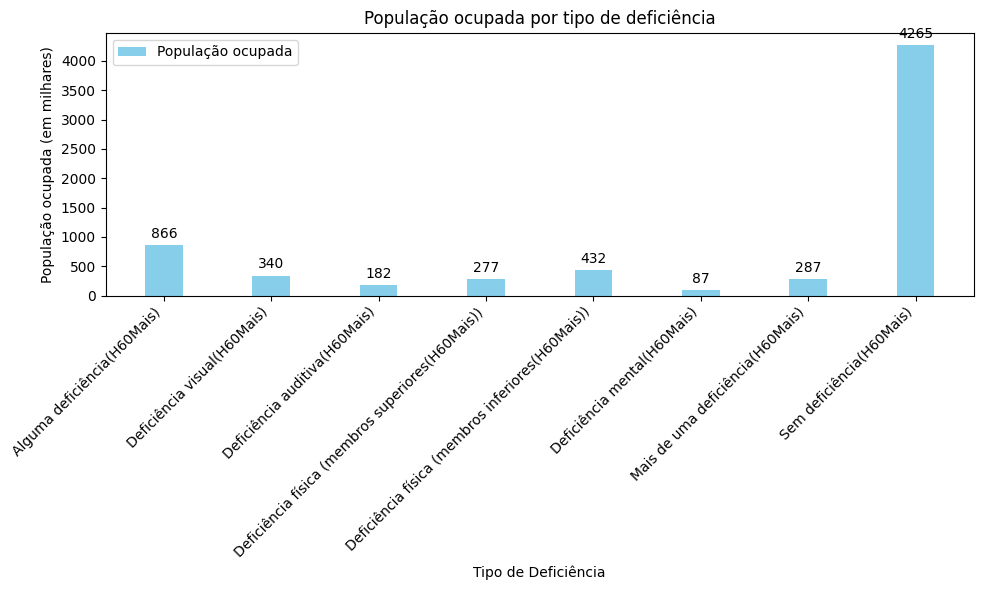

In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
                       'Deficiência visual(H60Mais)',
                       'Deficiência auditiva(H60Mais)',
                       'Deficiência física (membros superiores(H60Mais))',
                       'Deficiência física (membros inferiores(H60Mais))',
                       'Deficiência mental(H60Mais)',
                       'Mais de uma deficiência(H60Mais)',
                       'Sem deficiência(H60Mais)']

populacao_ocupada_3_ = [Alg_deficiencia_3_,
                        deficiencia_Visual_3_,
                        deficiencia_auditiva_3_,
                        deficiencia_fsSup_3_,
                        deficiencia_fsInf_3_,
                        deficiencia_Mental_3_,
                        deficiencia_Mais1_3_,
                        sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_ocupada_3_, width, label='População ocupada', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada (em milhares)')
ax.set_title('População ocupada por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_3_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
                       'Deficiência visual(H60Mais)',
                       'Deficiência auditiva(H60Mais)',
                       'Deficiência física (membros superiores(H60Mais))',
                       'Deficiência física (membros inferiores(H60Mais))',
                       'Deficiência mental(H60Mais)',
                       'Mais de uma deficiência(H60Mais)',
                       'Sem deficiência(H60Mais)']

populacao_ocupada_3_ = [Alg_deficiencia_3_,
                        deficiencia_Visual_3_,
                        deficiencia_auditiva_3_,
                        deficiencia_fsSup_3_,
                        deficiencia_fsInf_3_,
                        deficiencia_Mental_3_,
                        deficiencia_Mais1_3_,
                        sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_ocupada_3_, width, label='População ocupada')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada (em milhares)')
ax.set_title('População ocupada por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_3_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 5. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Visual_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_auditiva_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsSup_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M2_14anos))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsInf_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M2_14anos))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mental_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mais1_4_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))
sem_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M2_14anos)', 'População ocupada\n'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_4_ = deficiencia_fsSup_4_ - deficiencia_fsInf_4_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} ocupada.".format(Alg_deficiencia_4_))
print("População com deficiência visual: {} ocupada.".format(deficiencia_Visual_4_))
print("População com deficiência auditiva: {} ocupada.".format(deficiencia_auditiva_4_))
print("População com deficiência mental: {} ocupada.".format(deficiencia_Mental_4_))
print("População com mais de uma deficiência: {} ocupada.".format(deficiencia_Mais1_4_))
print("População com deficiência física (membros superiores): {} ocupada.".format(deficiencia_fsSup_4_))
print("População com deficiência física (membros inferiores): {} ocupada.".format(deficiencia_fsInf_4_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_4_)))

População com alguma deficiência: 362 ocupada.
População com deficiência visual: 134 ocupada.
População com deficiência auditiva: 51 ocupada.
População com deficiência mental: 97 ocupada.
População com mais de uma deficiência: 49 ocupada.
População com deficiência física (membros superiores): 100 ocupada.
População com deficiência física (membros inferiores): 62 ocupada.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 38 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M2_14anos)',
                       'Deficiência visual(M2_14anos)',
                       'Deficiência auditiva(M2_14anos)',
                       'Deficiência física (membros superiores(M2_14anos))',
                       'Deficiência física (membros inferiores(M2_14anos))',
                       'Deficiência mental(M2_14anos)',
                       'Mais de uma deficiência(M2_14anos)',
                       'Sem deficiência(M2_14anos)']

populacao_ocupada_4_ = [Alg_deficiencia_4_,
                        deficiencia_Visual_4_,
                        deficiencia_auditiva_4_,
                        deficiencia_fsSup_4_,
                        deficiencia_fsInf_4_,
                        deficiencia_Mental_4_,
                        deficiencia_Mais1_4_,
                        sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_ocupada_4_, width, label='População ocupada', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada (em milhares)')
ax.set_title('População ocupada por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M2_14anos)',
                       'Deficiência visual(M2_14anos)',
                       'Deficiência auditiva(M2_14anos)',
                       'Deficiência física (membros superiores(M2_14anos))',
                       'Deficiência física (membros inferiores(M2_14anos))',
                       'Deficiência mental(M2_14anos)',
                       'Mais de uma deficiência(M2_14anos)',
                       'Sem deficiência(M2_14anos)']

populacao_ocupada_4_ = [Alg_deficiencia_4_,
                        deficiencia_Visual_4_,
                        deficiencia_auditiva_4_,
                        deficiencia_fsSup_4_,
                        deficiencia_fsInf_4_,
                        deficiencia_Mental_4_,
                        deficiencia_Mais1_4_,
                        sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_ocupada_4_, width, label='População na força de trabalho')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 6. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Visual_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_auditiva_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsSup_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M60Mais))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_fsInf_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M60Mais))', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mental_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
deficiencia_Mais1_5_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))
sem_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M60Mais)', 'População ocupada\n'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_5_ = deficiencia_fsSup_5_ - deficiencia_fsInf_5_

# Exibindo os valores e a diferença numérica
print("População na força de trabalho com alguma deficiência: {}.".format(Alg_deficiencia_5_))
print("População na força de trabalho com deficiência visual: {}.".format(deficiencia_Visual_5_))
print("População na força de trabalho com deficiência auditiva: {}.".format(deficiencia_auditiva_5_))
print("População na força de trabalho com deficiência mental: {}.".format(deficiencia_Mental_5_))
print("População na força de trabalho com mais de uma deficiência: {}.".format(deficiencia_Mais1_5_))
print("População na força de trabalho com deficiência física (membros superiores): {}.".format(deficiencia_fsSup_5_))
print("População na força de trabalho com deficiência física (membros inferiores): {}.".format(deficiencia_fsInf_5_))

print("A diferença numérica entre pessoas na força de trabalho com deficiência física superior e inferior é de {}.".format(abs(diferenca_numerica_fisica_5_)))

População na força de trabalho com alguma deficiência: 641.
População na força de trabalho com deficiência visual: 254.
População na força de trabalho com deficiência auditiva: 105.
População na força de trabalho com deficiência mental: 75.
População na força de trabalho com mais de uma deficiência: 217.
População na força de trabalho com deficiência física (membros superiores): 241.
População na força de trabalho com deficiência física (membros inferiores): 354.
A diferença numérica entre pessoas na força de trabalho com deficiência física superior e inferior é de 113.


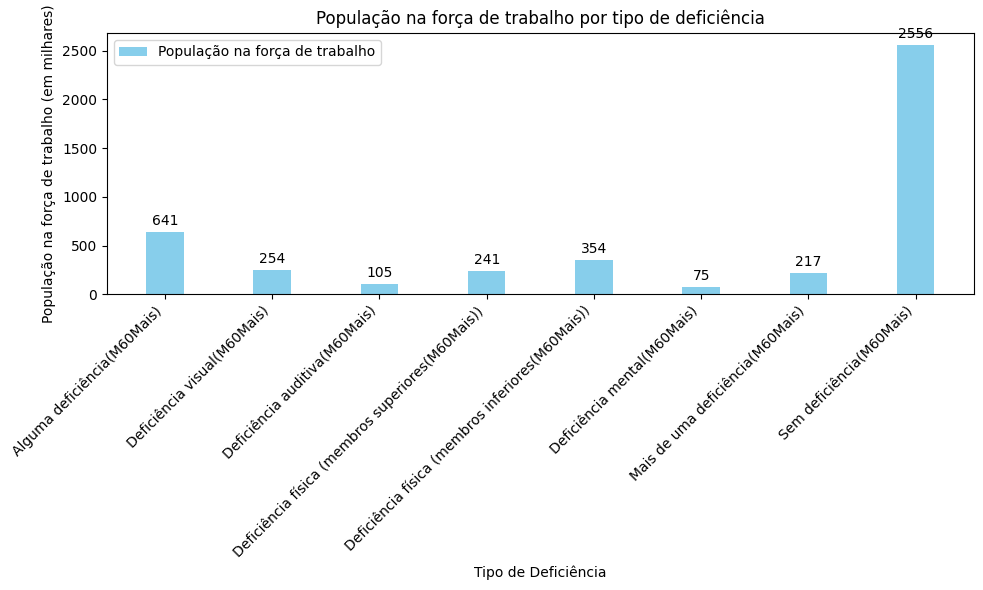

In [ ]:
# Definindo os dados
tipos_deficiencia_5_ = ['Alguma deficiência(M60Mais)',
                        'Deficiência visual(M60Mais)',
                        'Deficiência auditiva(M60Mais)',
                        'Deficiência física (membros superiores(M60Mais))',
                        'Deficiência física (membros inferiores(M60Mais))',
                        'Deficiência mental(M60Mais)',
                        'Mais de uma deficiência(M60Mais)',
                        'Sem deficiência(M60Mais)']

populacao_ocupada_5_ = [Alg_deficiencia_5_,
                        deficiencia_Visual_5_,
                        deficiencia_auditiva_5_,
                        deficiencia_fsSup_5_,
                        deficiencia_fsInf_5_,
                        deficiencia_Mental_5_,
                        deficiencia_Mais1_5_,
                        sem_deficiencia_5_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_5_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_ocupada_5_, width, label='População na força de trabalho', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_5_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

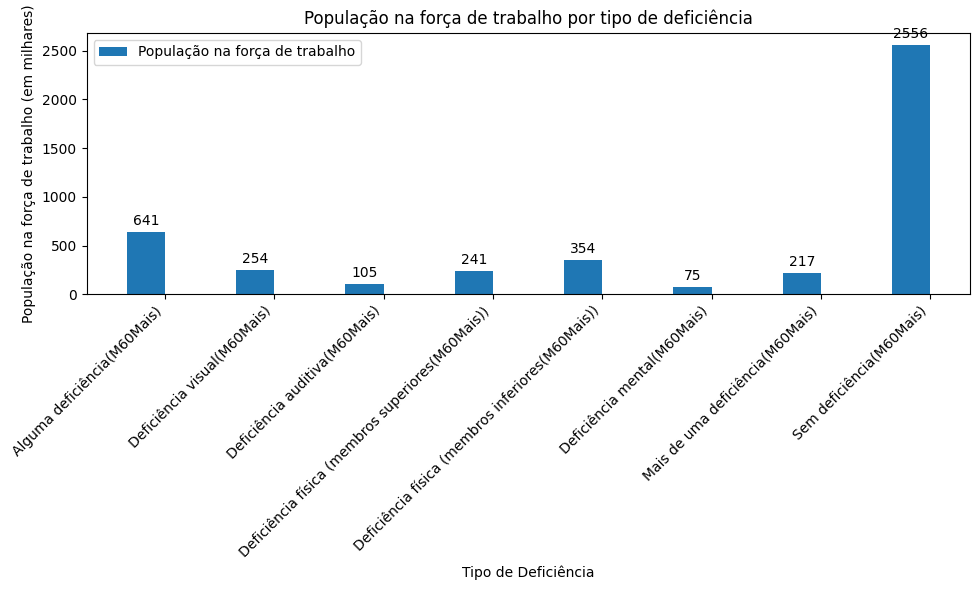

In [ ]:
# Definindo os dados
tipos_deficiencia_5_= ['Alguma deficiência(M60Mais)',
                       'Deficiência visual(M60Mais)',
                       'Deficiência auditiva(M60Mais)',
                       'Deficiência física (membros superiores(M60Mais))',
                       'Deficiência física (membros inferiores(M60Mais))',
                       'Deficiência mental(M60Mais)',
                       'Mais de uma deficiência(M60Mais)',
                       'Sem deficiência(M60Mais)']
populacao_ocupada_5_ = [Alg_deficiencia_5_,
                        deficiencia_Visual_5_,
                        deficiencia_auditiva_5_,
                        deficiencia_fsSup_5_,
                        deficiencia_fsInf_5_,
                        deficiencia_Mental_5_,
                        deficiencia_Mais1_5_,
                        sem_deficiencia_5_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_5_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_ocupada_5_, width, label='População na força de trabalho')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População na força de trabalho (em milhares)')
ax.set_title('População na força de trabalho por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_5_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

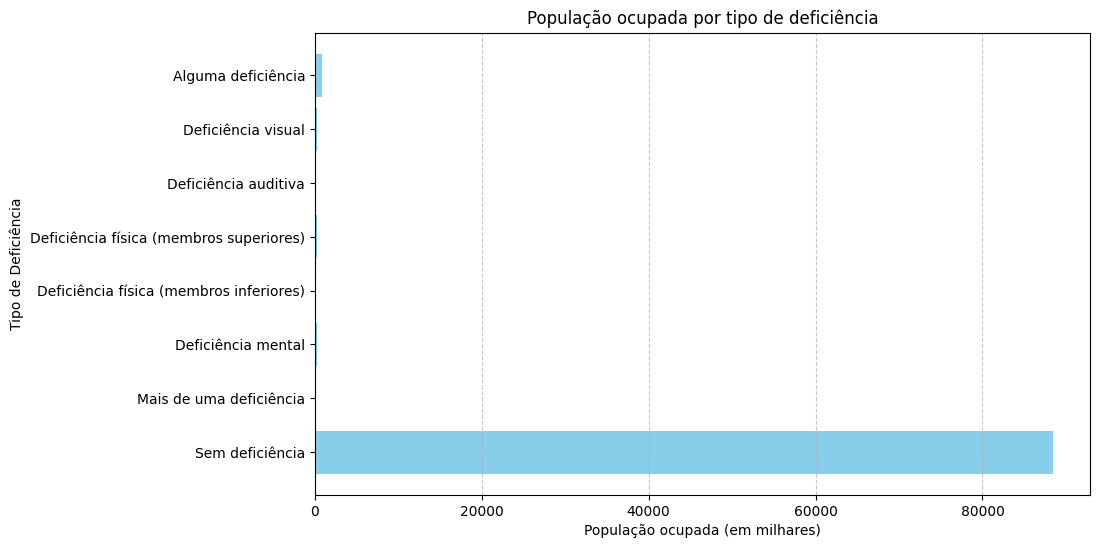

In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_ocupada = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(tipos_deficiencia, populacao_ocupada, color='skyblue')
plt.xlabel('População ocupada (em milhares)')
plt.ylabel('Tipo de Deficiência')
plt.title('População ocupada por tipo de deficiência')
plt.gca().invert_yaxis()  # Inverter os eixos para que a deficiência mais comum seja exibida no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#**População Ocupada com trabalhos formais [unidades de milhar]**

#####1. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 2 a 14 anos no domicílio**

In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Visual = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_auditiva = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsSup = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(2_14anos))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsInf = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(2_14anos))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mental = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mais1 = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
sem_deficiencia = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica = deficiencia_fsSup - deficiencia_fsInf

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com população em Trabalho Formal.".format(Alg_deficiencia))
print("População com deficiência visual: {} com população em Trabalho Formal.".format(deficiencia_Visual))
print("População com deficiência auditiva: {} com população em Trabalho Formal.".format(deficiencia_auditiva))
print("População com deficiência mental: {} com população em Trabalho Formal.".format(deficiencia_Mental))
print("População com mais de uma deficiência: {} com população em Trabalho Formal.".format(deficiencia_Mais1))
print("População com deficiência física (membros superiores): {} com população em Trabalho Formal.".format(deficiencia_fsSup))
print("População com deficiência física (membros inferiores): {} com população em Trabalho Formal.".format(deficiencia_fsInf))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica)))

População com alguma deficiência: 322 com população em Trabalho Formal.
População com deficiência visual: 116 com população em Trabalho Formal.
População com deficiência auditiva: 37 com população em Trabalho Formal.
População com deficiência mental: 94 com população em Trabalho Formal.
População com mais de uma deficiência: 45 com população em Trabalho Formal.
População com deficiência física (membros superiores): 97 com população em Trabalho Formal.
População com deficiência física (membros inferiores): 54 com população em Trabalho Formal.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 43 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_trabalho_formal = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(tipos_deficiencia, populacao_trabalho_formal, color='skyblue')
plt.xlabel('População em Trabalho Formal (em milhares)')
plt.ylabel('Tipo de Deficiência')
plt.title('População em Trabalho Formal por tipo de deficiência')
plt.gca().invert_yaxis()  # Inverter os eixos para que a deficiência mais comum seja exibida no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
populacao_trabalho_formal = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_trabalho_formal, width, label='População em Trabalho Formal', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em Trabalho Formal (em milhares)')
ax.set_title('População em Trabalho Formal por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####2. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 60 anos ou mais no domicílio**

In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_1_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(60ouMais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Visual_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(60ouMais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_auditiva_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(60ouMais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsSup_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(60ouMais))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsInf_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(60ouMais))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mental_1_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(60ouMais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mais1_1_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(60ouMais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
sem_deficiencia_1_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(60ouMais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = deficiencia_fsSup_1_ - deficiencia_fsInf_1_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com população em Trabalho Formal.".format(Alg_deficiencia_1_))
print("População com deficiência visual: {} com população em Trabalho Formal.".format(deficiencia_Visual_1_))
print("População com deficiência auditiva: {} com população em Trabalho Formal.".format(deficiencia_auditiva_1_))
print("População com deficiência mental: {} com população em Trabalho Formal.".format(deficiencia_Mental_1_))
print("População com mais de uma deficiência: {} com população em Trabalho Formal.".format(deficiencia_Mais1_1_))
print("População com deficiência física (membros superiores): {} com população em Trabalho Formal.".format(deficiencia_fsSup_1_))
print("População com deficiência física (membros inferiores): {} com população em Trabalho Formal.".format(deficiencia_fsInf_1_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_1_)))


População com alguma deficiência: 405 com população em Trabalho Formal.
População com deficiência visual: 149 com população em Trabalho Formal.
População com deficiência auditiva: 97 com população em Trabalho Formal.
População com deficiência mental: 66 com população em Trabalho Formal.
População com mais de uma deficiência: 143 com população em Trabalho Formal.
População com deficiência física (membros superiores): 147 com população em Trabalho Formal.
População com deficiência física (membros inferiores): 188 com população em Trabalho Formal.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 41 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_1_= ['Alguma deficiência(60ouMais)',
'Deficiência visual(60ouMais)',
'Deficiência auditiva(60ouMais)',
'Deficiência física (membros superiores(60ouMais))',
'Deficiência física (membros inferiores(60ouMais))',
'Deficiência mental(60ouMais)',
'Mais de uma deficiência(60ouMais)',
'Sem deficiência(60ouMais)']
populacao_trabalho_formal_1_ = [Alg_deficiencia_1_, deficiencia_Visual_1_, deficiencia_auditiva_1_, deficiencia_fsSup_1_, deficiencia_fsInf_1_, deficiencia_Mental_1_, deficiencia_Mais1_1_, sem_deficiencia_1_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_1_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_trabalho_formal_1_, width, label='População em Trabalho Formal', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em Trabalho Formal (em milhares)')
ax.set_title('População em Trabalho Formal por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_1_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


#####3. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem om alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Comparação Tipo de Deficiência com alguma pessoa de 2 a 14 anos no domicílio

# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_2_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Visual_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(H2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_auditiva_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsSup_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores)(H2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsInf_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores)(H2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mental_2_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(H2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mais1_2_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
sem_deficiencia_2_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(H2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_2_ = deficiencia_fsSup_2_ - deficiencia_fsInf_2_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com população em Trabalho Formal.".format(Alg_deficiencia_2_))
print("População com deficiência visual: {} com população em Trabalho Formal.".format(deficiencia_Visual_2_))
print("População com deficiência auditiva: {} com população em Trabalho Formal.".format(deficiencia_auditiva_2_))
print("População com deficiência mental: {} com população em Trabalho Formal.".format(deficiencia_Mental_2_))
print("População com mais de uma deficiência: {} com população em Trabalho Formal.".format(deficiencia_Mais1_2_))
print("População com deficiência física (membros superiores): {} com população em Trabalho Formal.".format(deficiencia_fsSup_2_))
print("População com deficiência física (membros inferiores): {} com população em Trabalho Formal.".format(deficiencia_fsInf_2_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_2_)))


População com alguma deficiência: 192 com população em Trabalho Formal.
População com deficiência visual: 67 com população em Trabalho Formal.
População com deficiência auditiva: 23 com população em Trabalho Formal.
População com deficiência mental: 64 com população em Trabalho Formal.
População com mais de uma deficiência: 35 com população em Trabalho Formal.
População com deficiência física (membros superiores): 57 com população em Trabalho Formal.
População com deficiência física (membros inferiores): 41 com população em Trabalho Formal.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 16 pessoas.


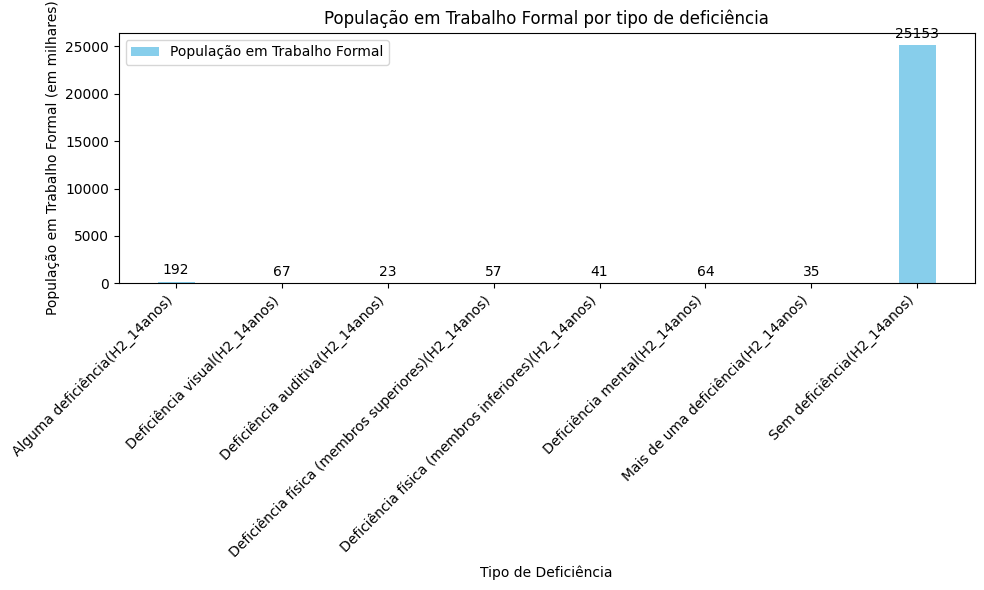

In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
'Deficiência visual(H2_14anos)',
'Deficiência auditiva(H2_14anos)',
'Deficiência física (membros superiores)(H2_14anos)',
'Deficiência física (membros inferiores)(H2_14anos)',
'Deficiência mental(H2_14anos)',
'Mais de uma deficiência(H2_14anos)',
'Sem deficiência(H2_14anos)']
populacao_trabalho_formal_2_ = [Alg_deficiencia_2_, deficiencia_Visual_2_, deficiencia_auditiva_2_, deficiencia_fsSup_2_, deficiencia_fsInf_2_, deficiencia_Mental_2_, deficiencia_Mais1_2_, sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_trabalho_formal_2_, width, label='População em Trabalho Formal', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em Trabalho Formal (em milhares)')
ax.set_title('População em Trabalho Formal por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


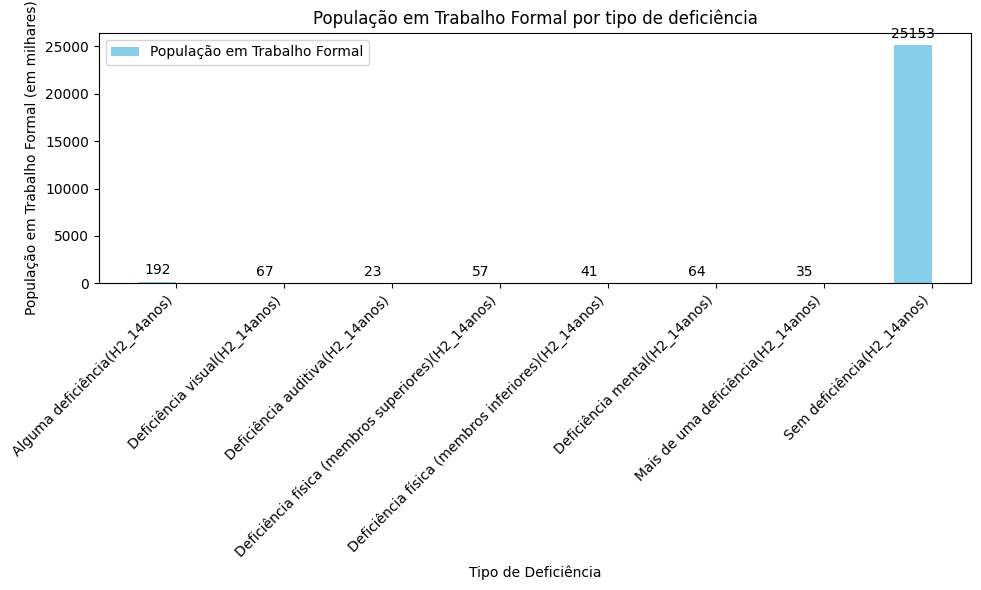

In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
'Deficiência visual(H2_14anos)',
'Deficiência auditiva(H2_14anos)',
'Deficiência física (membros superiores)(H2_14anos)',
'Deficiência física (membros inferiores)(H2_14anos)',
'Deficiência mental(H2_14anos)',
'Mais de uma deficiência(H2_14anos)',
'Sem deficiência(H2_14anos)']
populacao_trabalho_formal_2_ = [Alg_deficiencia_2_, deficiencia_Visual_2_, deficiencia_auditiva_2_, deficiencia_fsSup_2_, deficiencia_fsInf_2_, deficiencia_Mental_2_, deficiencia_Mais1_2_, sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_trabalho_formal_2_, width, label='População em Trabalho Formal', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em Trabalho Formal (em milhares)')
ax.set_title('População em Trabalho Formal por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


#####4. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem om alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_3_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Visual_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(H60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_auditiva_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsSup_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(H60Mais))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsInf_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(H60Mais))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mental_3_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(H60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mais1_3_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
sem_deficiencia_3_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(H60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_3_ = deficiencia_fsSup_3_ - deficiencia_fsInf_3_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} em Trabalho Formal.".format(Alg_deficiencia_3_))
print("População com deficiência visual: {} em Trabalho Formal.".format(deficiencia_Visual_3_))
print("População com deficiência auditiva: {} em Trabalho Formal.".format(deficiencia_auditiva_3_))
print("População com deficiência mental: {} em Trabalho Formal.".format(deficiencia_Mental_3_))
print("População com mais de uma deficiência: {} em Trabalho Formal.".format(deficiencia_Mais1_3_))
print("População com deficiência física (membros superiores): {} em Trabalho Formal.".format(deficiencia_fsSup_3_))
print("População com deficiência física (membros inferiores): {} em Trabalho Formal.".format(deficiencia_fsInf_3_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_3_)))


População com alguma deficiência: 236 em Trabalho Formal.
População com deficiência visual: 84 em Trabalho Formal.
População com deficiência auditiva: 59 em Trabalho Formal.
População com deficiência mental: 35 em Trabalho Formal.
População com mais de uma deficiência: 82 em Trabalho Formal.
População com deficiência física (membros superiores): 70 em Trabalho Formal.
População com deficiência física (membros inferiores): 103 em Trabalho Formal.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 33 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
'Deficiência visual(H60Mais)',
'Deficiência auditiva(H60Mais)',
'Deficiência física (membros superiores(H60Mais))',
'Deficiência física (membros inferiores(H60Mais))',
'Deficiência mental(H60Mais)',
'Mais de uma deficiência(H60Mais)',
'Sem deficiência(H60Mais)']
populacao_idade_trabalhar_3_ = [Alg_deficiencia_3_, deficiencia_Visual_3_, deficiencia_auditiva_3_, deficiencia_fsSup_3_, deficiencia_fsInf_3_, deficiencia_Mental_3_, deficiencia_Mais1_3_, sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_idade_trabalhar_3_, width, label='População em Trabalho Formal', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em Trabalho Formal (em milhares)')
ax.set_title('População em Trabalho Formal por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_3_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
'Deficiência visual(H60Mais)',
'Deficiência auditiva(H60Mais)',
'Deficiência física (membros superiores(H60Mais))',
'Deficiência física (membros inferiores(H60Mais))',
'Deficiência mental(H60Mais)',
'Mais de uma deficiência(H60Mais)',
'Sem deficiência(H60Mais)']
populacao_idade_trabalhar_3_ = [Alg_deficiencia_3_, deficiencia_Visual_3_, deficiencia_auditiva_3_, deficiencia_fsSup_3_, deficiencia_fsInf_3_, deficiencia_Mental_3_, deficiencia_Mais1_3_, sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_idade_trabalhar_3_, width, label='População em Trabalho Formal')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População em Trabalho Formal (em milhares)')
ax.set_title('População em Trabalho Formal por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_3_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####5. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Visual_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_auditiva_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsSup_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M2_14anos))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsInf_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M2_14anos))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mental_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mais1_4_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
sem_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M2_14anos)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_4_ = deficiencia_fsSup_4_ - deficiencia_fsInf_4_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} com População ocupada em trabalhos formais.".format(Alg_deficiencia_4_))
print("População com deficiência visual: {} com População ocupada em trabalhos formais.".format(deficiencia_Visual_4_))
print("População com deficiência auditiva: {} com População ocupada em trabalhos formais.".format(deficiencia_auditiva_4_))
print("População com deficiência mental: {} com População ocupada em trabalhos formais.".format(deficiencia_Mental_4_))
print("População com mais de uma deficiência: {} com População ocupada em trabalhos formais.".format(deficiencia_Mais1_4_))
print("População com deficiência física (membros superiores): {} com População ocupada em trabalhos formais.".format(deficiencia_fsSup_4_))
print("População com deficiência física (membros inferiores): {} com População ocupada em trabalhos formais.".format(deficiencia_fsInf_4_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_4_)))


População com alguma deficiência: 130 com População ocupada em trabalhos formais.
População com deficiência visual: 50 com População ocupada em trabalhos formais.
População com deficiência auditiva: 14 com População ocupada em trabalhos formais.
População com deficiência mental: 30 com População ocupada em trabalhos formais.
População com mais de uma deficiência: 10 com População ocupada em trabalhos formais.
População com deficiência física (membros superiores): 40 com População ocupada em trabalhos formais.
População com deficiência física (membros inferiores): 13 com População ocupada em trabalhos formais.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 27 pessoas.


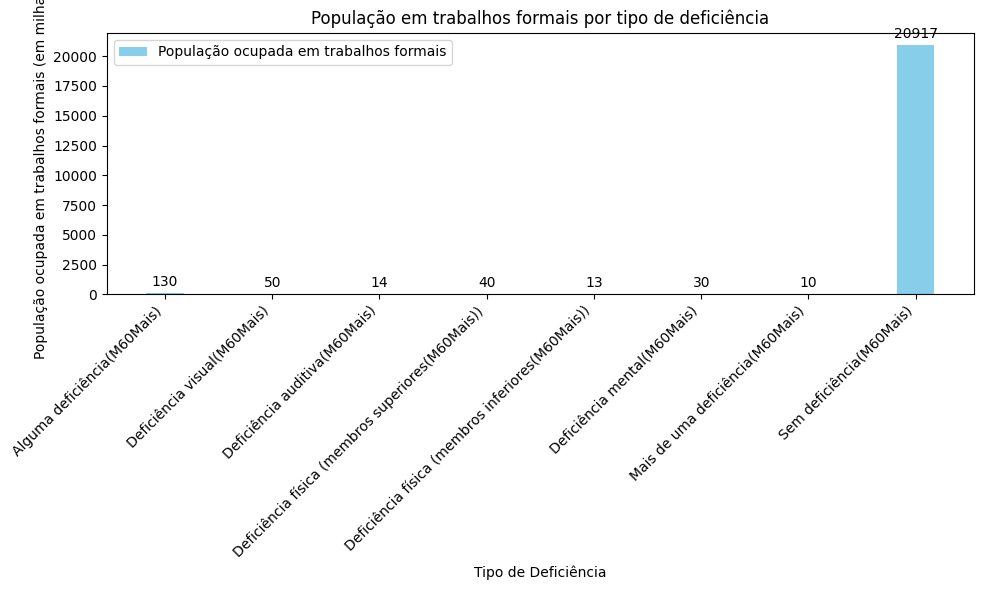

In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M60Mais)',
'Deficiência visual(M60Mais)',
'Deficiência auditiva(M60Mais)',
'Deficiência física (membros superiores(M60Mais))',
'Deficiência física (membros inferiores(M60Mais))',
'Deficiência mental(M60Mais)',
'Mais de uma deficiência(M60Mais)',
'Sem deficiência(M60Mais)',]
populacao_idade_trabalhar_4_ = [Alg_deficiencia_4_, deficiencia_Visual_4_, deficiencia_auditiva_4_, deficiencia_fsSup_4_, deficiencia_fsInf_4_, deficiencia_Mental_4_, deficiencia_Mais1_4_, sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_idade_trabalhar_4_, width, label='População ocupada em trabalhos formais', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada em trabalhos formais (em milhares)')
ax.set_title('População em trabalhos formais por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M60Mais)',
'Deficiência visual(M60Mais)',
'Deficiência auditiva(M60Mais)',
'Deficiência física (membros superiores(M60Mais))',
'Deficiência física (membros inferiores(M60Mais))',
'Deficiência mental(M60Mais)',
'Mais de uma deficiência(M60Mais)',
'Sem deficiência(M60Mais)',]
populacao_idade_trabalhar_4_ = [Alg_deficiencia_4_, deficiencia_Visual_4_, deficiencia_auditiva_4_, deficiencia_fsSup_4_, deficiencia_fsInf_4_, deficiencia_Mental_4_, deficiencia_Mais1_4_, sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, populacao_idade_trabalhar_4_, width, label='População ocupada em trabalhos formais')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada em trabalhos formais (em milhares)')
ax.set_title('População em trabalhos formais por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####6. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Visual_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_auditiva_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsSup_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M60Mais))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_fsInf_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M60Mais))', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mental_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
deficiencia_Mais1_5_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))
sem_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M60Mais)', 'População ocupada em trabalhos formais'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_5_ = deficiencia_fsSup_5_ - deficiencia_fsInf_5_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {} em trabalhos formais.".format(Alg_deficiencia_5_))
print("População com deficiência visual: {} em trabalhos formais.".format(deficiencia_Visual_5_))
print("População com deficiência auditiva: {} em trabalhos formais.".format(deficiencia_auditiva_5_))
print("População com deficiência mental: {} em trabalhos formais.".format(deficiencia_Mental_5_))
print("População com mais de uma deficiência: {} em trabalhos formais.".format(deficiencia_Mais1_5_))
print("População com deficiência física (membros superiores): {} em trabalhos formais.".format(deficiencia_fsSup_5_))
print("População com deficiência física (membros inferiores): {} em trabalhos formais.".format(deficiencia_fsInf_5_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {} pessoas.".format(abs(diferenca_numerica_fisica_5_)))

População com alguma deficiência: 169 em trabalhos formais.
População com deficiência visual: 65 em trabalhos formais.
População com deficiência auditiva: 37 em trabalhos formais.
População com deficiência mental: 31 em trabalhos formais.
População com mais de uma deficiência: 61 em trabalhos formais.
População com deficiência física (membros superiores): 77 em trabalhos formais.
População com deficiência física (membros inferiores): 85 em trabalhos formais.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 8 pessoas.


In [ ]:
# Definindo os dados
tipos_deficiencia_5_= ['Alguma deficiência(M60Mais)',
'Deficiência visual(M60Mais)',
'Deficiência auditiva(M60Mais)',
'Deficiência física (membros superiores(M60Mais))',
'Deficiência física (membros inferiores(M60Mais))',
'Deficiência mental(M60Mais)',
'Mais de uma deficiência(M60Mais)',
'Sem deficiência(M60Mais)',]
populacao_ocupada_trabalhos_formais_5_ = [Alg_deficiencia_5_, deficiencia_Visual_5_, deficiencia_auditiva_5_, deficiencia_fsSup_5_, deficiencia_fsInf_5_, deficiencia_Mental_5_, deficiencia_Mais1_5_, sem_deficiencia_5_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_5_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_ocupada_trabalhos_formais_5_, width, label='População ocupada em trabalhos formais', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('População ocupada em trabalhos formais (em milhares)')
ax.set_title('População ocupada em trabalhos formais por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_5_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#**Taxa de participação [porcentagem]**

##### 1. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 2 a 14 anos no domicílio**

In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia = df.loc[df['Características selecionadas'] == 'Alguma deficiência(2_14anos)', 'Taxa de participação_porcentagem'].values[0]
deficiencia_Visual = df.loc[df['Características selecionadas'] == 'Deficiência visual(2_14anos)', 'Taxa de participação_porcentagem'].values[0]
deficiencia_auditiva = df.loc[df['Características selecionadas'] == 'Deficiência auditiva(2_14anos)', 'Taxa de participação_porcentagem'].values[0]
deficiencia_fsSup = df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(2_14anos))', 'Taxa de participação_porcentagem'].values[0]
deficiencia_fsInf = df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(2_14anos))', 'Taxa de participação_porcentagem'].values[0]
deficiencia_Mental = df.loc[df['Características selecionadas'] == 'Deficiência mental(2_14anos)', 'Taxa de participação_porcentagem'].values[0]
deficiencia_Mais1 = df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(2_14anos)', 'Taxa de participação_porcentagem'].values[0]
sem_deficiencia = df.loc[df['Características selecionadas'] == 'Sem deficiência(2_14anos)', 'Taxa de participação_porcentagem'].values[0]

# Calculando a diferença numérica
diferenca_numerica_fisica = deficiencia_fsSup - deficiencia_fsInf

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {:.2f}% de participação.".format(Alg_deficiencia))
print("População com deficiência visual: {:.2f}% de participação.".format(deficiencia_Visual))
print("População com deficiência auditiva: {:.2f}% de participação.".format(deficiencia_auditiva))
print("População com deficiência mental: {:.2f}% de participação.".format(deficiencia_Mental))
print("População com mais de uma deficiência: {:.2f}% de participação.".format(deficiencia_Mais1))
print("População com deficiência física (membros superiores): {:.2f}% de participação.".format(deficiencia_fsSup))
print("População com deficiência física (membros inferiores): {:.2f}% de participação.".format(deficiencia_fsInf))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {:.2f}%.".format(abs(diferenca_numerica_fisica)))

População com alguma deficiência: 64.90% de participação.
População com deficiência visual: 66.10% de participação.
População com deficiência auditiva: 68.90% de participação.
População com deficiência mental: 58.20% de participação.
População com mais de uma deficiência: 58.90% de participação.
População com deficiência física (membros superiores): 66.60% de participação.
População com deficiência física (membros inferiores): 61.10% de participação.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 5.50%.


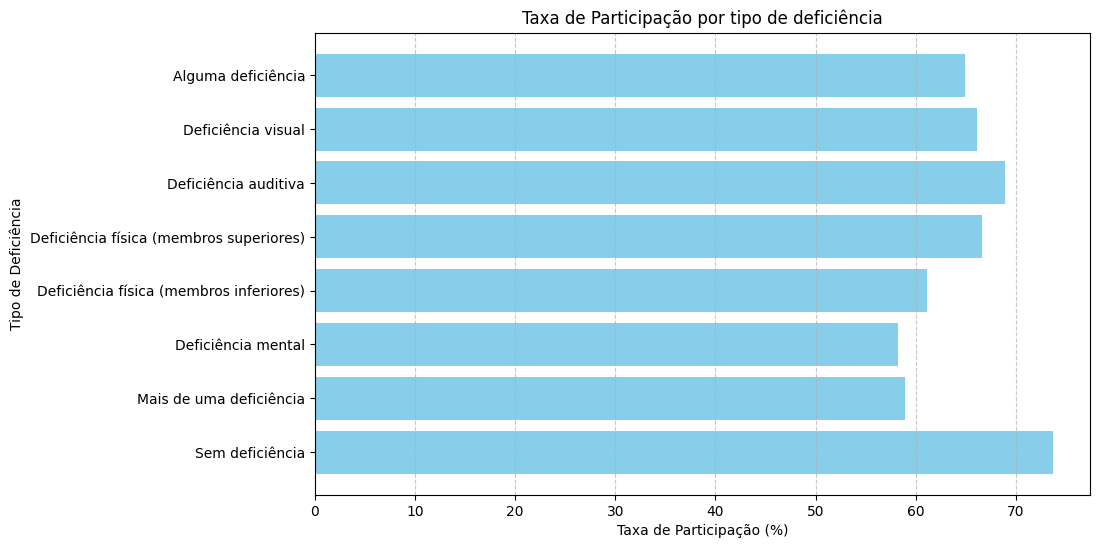

In [ ]:
# Definindo os dados
tipos_deficiencia = ['Alguma deficiência', 'Deficiência visual', 'Deficiência auditiva', 'Deficiência física (membros superiores)', 'Deficiência física (membros inferiores)', 'Deficiência mental', 'Mais de uma deficiência', 'Sem deficiência']
taxa_participacao = [Alg_deficiencia, deficiencia_Visual, deficiencia_auditiva, deficiencia_fsSup, deficiencia_fsInf, deficiencia_Mental, deficiencia_Mais1, sem_deficiencia]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(tipos_deficiencia, taxa_participacao, color='skyblue')
plt.xlabel('Taxa de Participação (%)')
plt.ylabel('Tipo de Deficiência')
plt.title('Taxa de Participação por tipo de deficiência')
plt.gca().invert_yaxis()  # Inverter os eixos para que a deficiência mais comum seja exibida no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

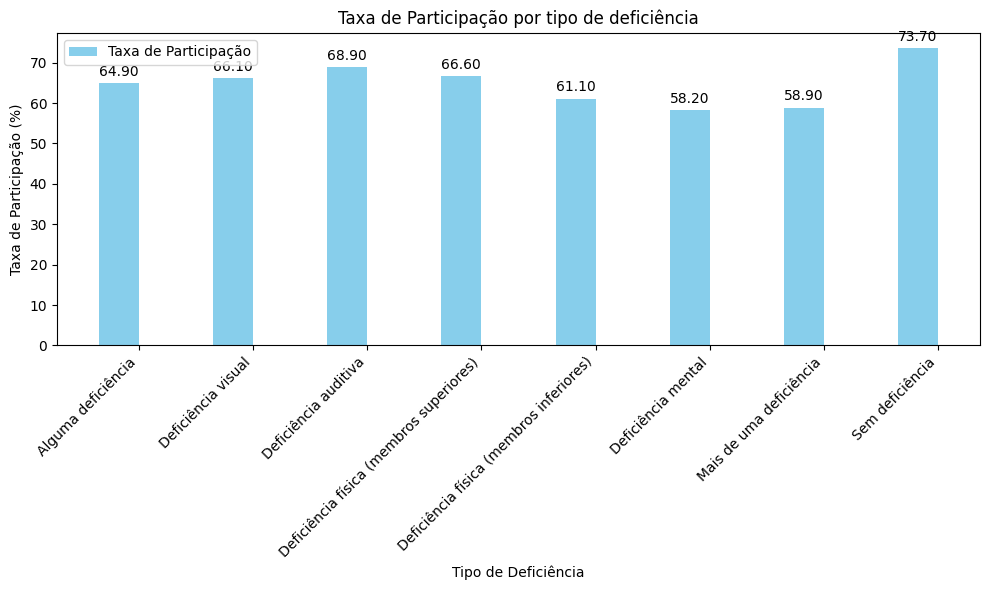

In [ ]:
# Criando o gráfico de barras verticais
x = np.arange(len(tipos_deficiencia))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x - width/2, taxa_participacao, width, label='Taxa de Participação', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('Taxa de Participação (%)')
ax.set_title('Taxa de Participação por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{:.2f}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####2. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por **Tipo de deficiência** - **Com alguma pessoa de 60 anos ou mais no domicílio**

In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_1_ = float(df.loc[df['Características selecionadas'] == 'Alguma deficiência(60ouMais)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Visual_1_ = float(df.loc[df['Características selecionadas'] == 'Deficiência visual(60ouMais)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_auditiva_1_ = float(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(60ouMais)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_fsSup_1_ = float(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(60ouMais))', 'Taxa de participação_porcentagem'].values[0])
deficiencia_fsInf_1_ = float(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(60ouMais))', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Mental_1_ = float(df.loc[df['Características selecionadas'] == 'Deficiência mental(60ouMais)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Mais1_1_ = float(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(60ouMais)', 'Taxa de participação_porcentagem'].values[0])
sem_deficiencia_1_ = float(df.loc[df['Características selecionadas'] == 'Sem deficiência(60ouMais)', 'Taxa de participação_porcentagem'].values[0])

# Calculando a diferença numérica
diferenca_numerica_fisica = deficiencia_fsSup_1_ - deficiencia_fsInf_1_

# Exibindo os valores e a diferença numérica
print("População com alguma deficiência: {:.2f}% de participação.".format(Alg_deficiencia_1_))
print("População com deficiência visual: {:.2f}% de participação.".format(deficiencia_Visual_1_))
print("População com deficiência auditiva: {:.2f}% de participação.".format(deficiencia_auditiva_1_))
print("População com deficiência mental: {:.2f}% de participação.".format(deficiencia_Mental_1_))
print("População com mais de uma deficiência: {:.2f}% de participação.".format(deficiencia_Mais1_1_))
print("População com deficiência física (membros superiores): {:.2f}% de participação.".format(deficiencia_fsSup_1_))
print("População com deficiência física (membros inferiores): {:.2f}% de participação.".format(deficiencia_fsInf_1_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {:.2f}%.".format(abs(diferenca_numerica_fisica)))

População com alguma deficiência: 14.20% de participação.
População com deficiência visual: 14.40% de participação.
População com deficiência auditiva: 13.70% de participação.
População com deficiência mental: 10.60% de participação.
População com mais de uma deficiência: 10.90% de participação.
População com deficiência física (membros superiores): 12.00% de participação.
População com deficiência física (membros inferiores): 12.20% de participação.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 0.20%.


In [ ]:
# Definindo os dados
tipos_deficiencia_1_= ['Alguma deficiência(60ouMais)',
'Deficiência visual(60ouMais)',
'Deficiência auditiva(60ouMais)',
'Deficiência física (membros superiores(60ouMais))',
'Deficiência física (membros inferiores(60ouMais))',
'Deficiência mental(60ouMais)',
'Mais de uma deficiência(60ouMais)',
'Sem deficiência(60ouMais)']
taxa_de_partipacao = [Alg_deficiencia_1_, deficiencia_Visual_1_, deficiencia_auditiva_1_, deficiencia_fsSup_1_, deficiencia_fsInf_1_, deficiencia_Mental_1_, deficiencia_Mais1_1_, sem_deficiencia_1_]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(tipos_deficiencia_1_, taxa_de_partipacao, color='skyblue')
plt.xlabel('Taxa de participação [porcentagem]')
plt.ylabel('Tipo de Deficiência')
plt.title('Taxa de participação [porcentagem] por tipo de deficiência')
plt.gca().invert_yaxis()  # Inverter os eixos para que a deficiência mais comum seja exibida no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

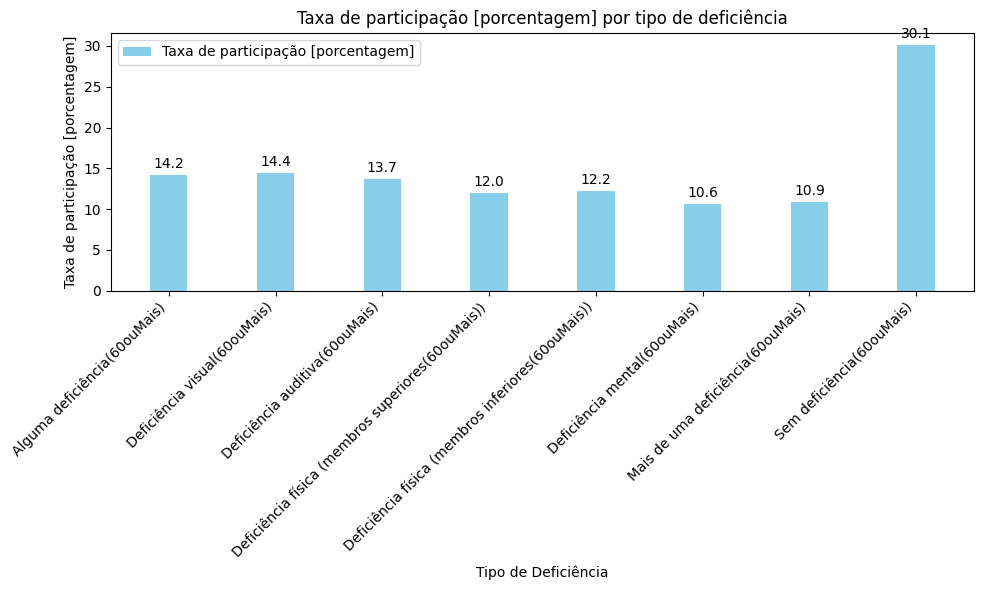

In [ ]:
# Definindo os dados
tipos_deficiencia_1_= ['Alguma deficiência(60ouMais)',
'Deficiência visual(60ouMais)',
'Deficiência auditiva(60ouMais)',
'Deficiência física (membros superiores(60ouMais))',
'Deficiência física (membros inferiores(60ouMais))',
'Deficiência mental(60ouMais)',
'Mais de uma deficiência(60ouMais)',
'Sem deficiência(60ouMais)']
taxa_de_partipacao = [Alg_deficiencia_1_, deficiencia_Visual_1_, deficiencia_auditiva_1_, deficiencia_fsSup_1_, deficiencia_fsInf_1_, deficiencia_Mental_1_, deficiencia_Mais1_1_, sem_deficiencia_1_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_1_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, taxa_de_partipacao, width, label='Taxa de participação [porcentagem]', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('Taxa de participação [porcentagem]')
ax.set_title('Taxa de participação [porcentagem] por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_1_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


#####3. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem om alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
Alg_deficiencia_2_ = float(df.loc[df['Características selecionadas'] == 'Alguma deficiência(H2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Visual_2_ = float(df.loc[df['Características selecionadas'] == 'Deficiência visual(H2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_auditiva_2_ = float(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_fsSup_2_ = float(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores)(H2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_fsInf_2_ = float(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores)(H2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Mental_2_ = float(df.loc[df['Características selecionadas'] == 'Deficiência mental(H2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Mais1_2_ = float(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H2_14anos)', 'Taxa de participação_porcentagem'].values[0])
sem_deficiencia_2_ = float(df.loc[df['Características selecionadas'] == 'Sem deficiência(H2_14anos)', 'Taxa de participação_porcentagem'].values[0])

# Calculando a diferença numérica
diferenca_numerica_fisica_2_ = deficiencia_fsSup_2_ - deficiencia_fsInf_2_

# Exibindo os valores e a diferença numérica
print("Taxa de participação com alguma deficiência: {:.2f}% de participação.".format(Alg_deficiencia_2_))
print("Taxa de participação com deficiência visual: {:.2f}% de participação.".format(deficiencia_Visual_2_))
print("Taxa de participação com deficiência auditiva: {:.2f}% de participação.".format(deficiencia_auditiva_2_))
print("Taxa de participação com deficiência mental: {:.2f}% de participação.".format(deficiencia_Mental_2_))
print("Taxa de participação com mais de uma deficiência: {:.2f}% de participação.".format(deficiencia_Mais1_2_))
print("Taxa de participação com deficiência física (membros superiores): {:.2f}% de participação.".format(deficiencia_fsSup_2_))
print("Taxa de participação com deficiência física (membros inferiores): {:.2f}% de participação.".format(deficiencia_fsInf_2_))

print("A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de {:.2f}% de participação.".format(abs(diferenca_numerica_fisica_2_)))

Taxa de participação com alguma deficiência: 80.00% de participação.
Taxa de participação com deficiência visual: 82.70% de participação.
Taxa de participação com deficiência auditiva: 63.40% de participação.
Taxa de participação com deficiência mental: 79.20% de participação.
Taxa de participação com mais de uma deficiência: 78.50% de participação.
Taxa de participação com deficiência física (membros superiores): 82.70% de participação.
Taxa de participação com deficiência física (membros inferiores): 80.70% de participação.
A diferença numérica entre pessoas com deficiência física superior e pessoas com deficiência física inferior é de 2.00% de participação.


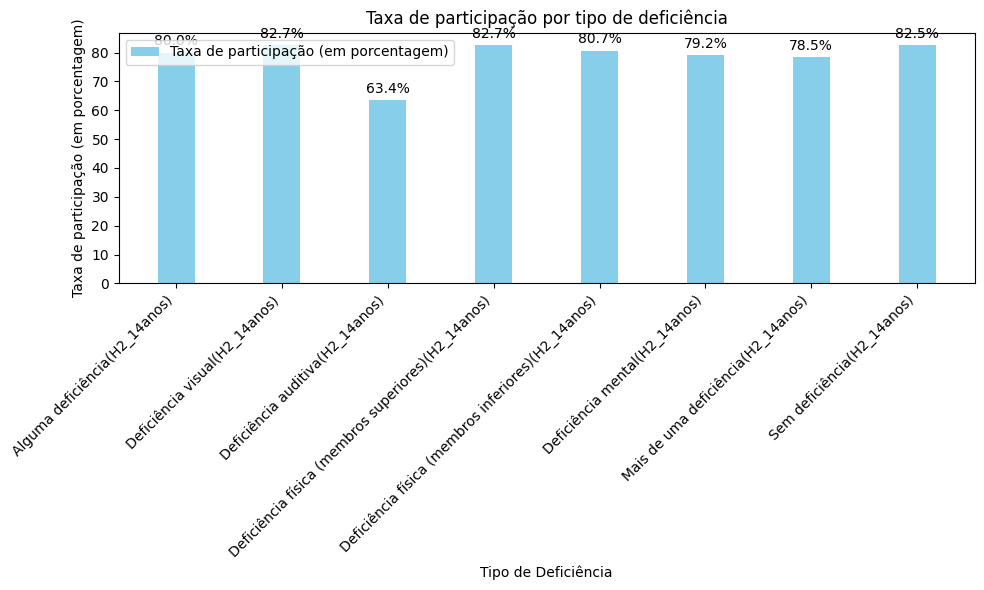

In [ ]:
# Definindo os dados
tipos_deficiencia_2_= ['Alguma deficiência(H2_14anos)',
                       'Deficiência visual(H2_14anos)',
                       'Deficiência auditiva(H2_14anos)',
                       'Deficiência física (membros superiores)(H2_14anos)',
                       'Deficiência física (membros inferiores)(H2_14anos)',
                       'Deficiência mental(H2_14anos)',
                       'Mais de uma deficiência(H2_14anos)',
                       'Sem deficiência(H2_14anos)']

taxa_de_participacao_2_ = [Alg_deficiencia_2_,
                                   deficiencia_Visual_2_,
                                   deficiencia_auditiva_2_,
                                   deficiencia_fsSup_2_,
                                   deficiencia_fsInf_2_,
                                   deficiencia_Mental_2_,
                                   deficiencia_Mais1_2_,
                                   sem_deficiencia_2_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_2_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, taxa_de_participacao_2_, width, label='Taxa de participação (em porcentagem)', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('Taxa de participação (em porcentagem)')
ax.set_title('Taxa de participação por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_2_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{}%'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####4. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Homem om alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_3_ = df.loc[df['Características selecionadas'] == 'Alguma deficiência(H60Mais)', 'Taxa de participação_porcentagem'].values[0]
deficiencia_Visual_3_ = df.loc[df['Características selecionadas'] == 'Deficiência visual(H60Mais)', 'Taxa de participação_porcentagem'].values[0]
deficiencia_auditiva_3_ = df.loc[df['Características selecionadas'] == 'Deficiência auditiva(H60Mais)', 'Taxa de participação_porcentagem'].values[0]
deficiencia_fsSup_3_ = df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(H60Mais))', 'Taxa de participação_porcentagem'].values[0]
deficiencia_fsInf_3_ = df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(H60Mais))', 'Taxa de participação_porcentagem'].values[0]
deficiencia_Mental_3_ = df.loc[df['Características selecionadas'] == 'Deficiência mental(H60Mais)', 'Taxa de participação_porcentagem'].values[0]
deficiencia_Mais1_3_ = df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(H60Mais)', 'Taxa de participação_porcentagem'].values[0]
sem_deficiencia_3_ = df.loc[df['Características selecionadas'] == 'Sem deficiência(H60Mais)', 'Taxa de participação_porcentagem'].values[0]

# Exibindo os valores
print("Taxa de participação das pessoas com alguma deficiência: {:.2f}% de participação.".format(Alg_deficiencia_3_))
print("Taxa de participação das pessoas com deficiência visual: {:.2f}% de participação.".format(deficiencia_Visual_3_))
print("Taxa de participação das pessoas com deficiência auditiva: {:.2f}% de participação.".format(deficiencia_auditiva_3_))
print("Taxa de participação das pessoas com deficiência mental: {:.2f}% de participação.".format(deficiencia_Mental_3_))
print("Taxa de participação das pessoas com mais de uma deficiência: {:.2f}% de participação.".format(deficiencia_Mais1_3_))
print("Taxa de participação das pessoas com deficiência física (membros superiores): {:.2f}% de participação.".format(deficiencia_fsSup_3_))
print("Taxa de participação das pessoas com deficiência física (membros inferiores): {:.2f}% de participação.".format(deficiencia_fsInf_3_))

Taxa de participação das pessoas com alguma deficiência: 21.00% de participação.
Taxa de participação das pessoas com deficiência visual: 20.50% de participação.
Taxa de participação das pessoas com deficiência auditiva: 19.90% de participação.
Taxa de participação das pessoas com deficiência mental: 14.60% de participação.
Taxa de participação das pessoas com mais de uma deficiência: 17.00% de participação.
Taxa de participação das pessoas com deficiência física (membros superiores): 17.90% de participação.
Taxa de participação das pessoas com deficiência física (membros inferiores): 18.30% de participação.


In [ ]:
# Definindo os dados
tipos_deficiencia_3_= ['Alguma deficiência(H60Mais)',
                       'Deficiência visual(H60Mais)',
                       'Deficiência auditiva(H60Mais)',
                       'Deficiência física (membros superiores(H60Mais))',
                       'Deficiência física (membros inferiores(H60Mais))',
                       'Deficiência mental(H60Mais)',
                       'Mais de uma deficiência(H60Mais)',
                       'Sem deficiência(H60Mais)']

populacao_na_forca_trabalho_3_ = [Alg_deficiencia_3_,
                                   deficiencia_Visual_3_,
                                   deficiencia_auditiva_3_,
                                   deficiencia_fsSup_3_,
                                   deficiencia_fsInf_3_,
                                   deficiencia_Mental_3_,
                                   deficiencia_Mais1_3_,
                                   sem_deficiencia_3_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_3_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_na_forca_trabalho_3_, width, label='Taxa de participação', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('Taxa de participação (em milhares)')
ax.set_title('Taxa de participação por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_3_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{:.2f}%'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####5. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 2 a 14 anos no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Visual_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_auditiva_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_fsSup_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M2_14anos))', 'Taxa de participação_porcentagem'].values[0])
deficiencia_fsInf_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M2_14anos))', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Mental_4_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M2_14anos)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Mais1_4_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M2_14anos)', 'Taxa de participação_porcentagem'].values[0])
sem_deficiencia_4_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M2_14anos)', 'Taxa de participação_porcentagem'].values[0])

# Exibindo os valores
print("Taxa de participação das pessoas com alguma deficiência: {:.2f}% de participação.".format(Alg_deficiencia_4_))
print("Taxa de participação das pessoas com deficiência visual: {:.2f}% de participação.".format(deficiencia_Visual_4_))
print("Taxa de participação das pessoas com deficiência auditiva: {:.2f}% de participação.".format(deficiencia_auditiva_4_))
print("Taxa de participação das pessoas com deficiência mental: {:.2f}% de participação.".format(deficiencia_Mental_4_))
print("Taxa de participação das pessoas com mais de uma deficiência: {:.2f}% de participação.".format(deficiencia_Mais1_4_))
print("Taxa de participação das pessoas com deficiência física (membros superiores): {:.2f}% de participação.".format(deficiencia_fsSup_4_))
print("Taxa de participação das pessoas com deficiência física (membros inferiores): {:.2f}% de participação.".format(deficiencia_fsInf_4_))

Taxa de participação das pessoas com alguma deficiência: 53.00% de participação.
Taxa de participação das pessoas com deficiência visual: 52.00% de participação.
Taxa de participação das pessoas com deficiência auditiva: 74.00% de participação.
Taxa de participação das pessoas com deficiência mental: 43.00% de participação.
Taxa de participação das pessoas com mais de uma deficiência: 44.00% de participação.
Taxa de participação das pessoas com deficiência física (membros superiores): 54.00% de participação.
Taxa de participação das pessoas com deficiência física (membros inferiores): 45.00% de participação.


In [ ]:
# Definindo os dados
tipos_deficiencia_4_= ['Alguma deficiência(M2_14anos)',
                       'Deficiência visual(M2_14anos)',
                       'Deficiência auditiva(M2_14anos)',
                       'Deficiência física (membros superiores(M2_14anos))',
                       'Deficiência física (membros inferiores(M2_14anos))',
                       'Deficiência mental(M2_14anos)',
                       'Mais de uma deficiência(M2_14anos)',
                       'Sem deficiência(M2_14anos)']

populacao_na_forca_trabalho_4_ = [Alg_deficiencia_4_,
                                   deficiencia_Visual_4_,
                                   deficiencia_auditiva_4_,
                                   deficiencia_fsSup_4_,
                                   deficiencia_fsInf_4_,
                                   deficiencia_Mental_4_,
                                   deficiencia_Mais1_4_,
                                   sem_deficiencia_4_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_4_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_na_forca_trabalho_4_, width, label='Taxa de participação', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('Taxa de participação (em milhares)')
ax.set_title('Taxa de participação por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_4_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{:.2f}%'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####6. Comparação e análise da **Indicador estrutural do mercado de trabalho** das pessoas de 15 a 59 anos de idade ou mais de idade por Tipo de deficiência - **Com alguma pessoa de 60 anos ou mais no domicílio**


In [ ]:
# Obtendo os valores Tipo de Deficiência e Sem Deficiência
Alg_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Alguma deficiência(M60Mais)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Visual_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência visual(M60Mais)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_auditiva_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência auditiva(M60Mais)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_fsSup_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros superiores(M60Mais))', 'Taxa de participação_porcentagem'].values[0])
deficiencia_fsInf_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência física (membros inferiores(M60Mais))', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Mental_5_ = int(df.loc[df['Características selecionadas'] == 'Deficiência mental(M60Mais)', 'Taxa de participação_porcentagem'].values[0])
deficiencia_Mais1_5_ = int(df.loc[df['Características selecionadas'] == 'Mais de uma deficiência(M60Mais)', 'Taxa de participação_porcentagem'].values[0])
sem_deficiencia_5_ = int(df.loc[df['Características selecionadas'] == 'Sem deficiência(M60Mais)', 'Taxa de participação_porcentagem'].values[0])

# Exibindo os valores
print("Taxa de participação das pessoas com alguma deficiência: {:.2f}% de participação.".format(Alg_deficiencia_5_))
print("Taxa de participação das pessoas com deficiência visual: {:.2f}% de participação.".format(deficiencia_Visual_5_))
print("Taxa de participação das pessoas com deficiência auditiva: {:.2f}% de participação.".format(deficiencia_auditiva_5_))
print("Taxa de participação das pessoas com deficiência mental: {:.2f}% de participação.".format(deficiencia_Mental_5_))
print("Taxa de participação das pessoas com mais de uma deficiência: {:.2f}% de participação.".format(deficiencia_Mais1_5_))
print("Taxa de participação das pessoas com deficiência física (membros superiores): {:.2f}% de participação.".format(deficiencia_fsSup_5_))
print("Taxa de participação das pessoas com deficiência física (membros inferiores): {:.2f}% de participação.".format(deficiencia_fsInf_5_))

Taxa de participação das pessoas com alguma deficiência: 9.00% de participação.
Taxa de participação das pessoas com deficiência visual: 10.00% de participação.
Taxa de participação das pessoas com deficiência auditiva: 9.00% de participação.
Taxa de participação das pessoas com deficiência mental: 8.00% de participação.
Taxa de participação das pessoas com mais de uma deficiência: 7.00% de participação.
Taxa de participação das pessoas com deficiência física (membros superiores): 8.00% de participação.
Taxa de participação das pessoas com deficiência física (membros inferiores): 8.00% de participação.


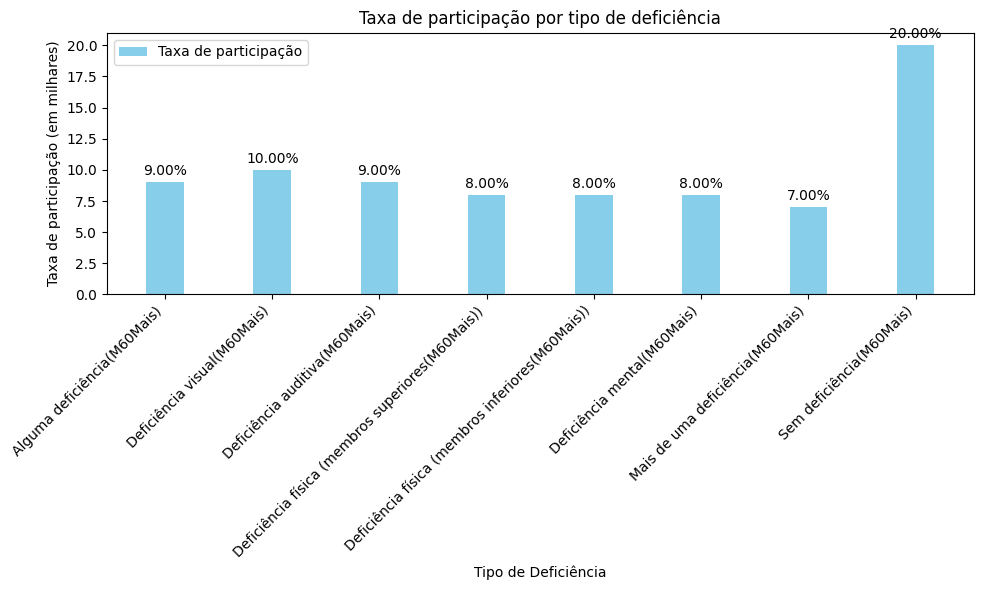

In [ ]:
# Definindo os dados
tipos_deficiencia_5_ = ['Alguma deficiência(M60Mais)',
                        'Deficiência visual(M60Mais)',
                        'Deficiência auditiva(M60Mais)',
                        'Deficiência física (membros superiores(M60Mais))',
                        'Deficiência física (membros inferiores(M60Mais))',
                        'Deficiência mental(M60Mais)',
                        'Mais de uma deficiência(M60Mais)',
                        'Sem deficiência(M60Mais)']

populacao_na_forca_trabalho_5_ = [Alg_deficiencia_5_,
                                  deficiencia_Visual_5_,
                                  deficiencia_auditiva_5_,
                                  deficiencia_fsSup_5_,
                                  deficiencia_fsInf_5_,
                                  deficiencia_Mental_5_,
                                  deficiencia_Mais1_5_,
                                  sem_deficiencia_5_]

# Criando o índice para as barras
x = np.arange(len(tipos_deficiencia_5_))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_deficiencia = ax.bar(x, populacao_na_forca_trabalho_5_, width, label='Taxa de participação', color='skyblue')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Tipo de Deficiência')
ax.set_ylabel('Taxa de participação (em milhares)')
ax.set_title('Taxa de participação por tipo de deficiência')
ax.set_xticks(x)
ax.set_xticklabels(tipos_deficiencia_5_, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
for barra in barras_deficiencia:
    altura = barra.get_height()
    ax.annotate('{:.2f}%'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# *MATRIZ DE CORRELAÇÃO TABELA*

<ipython-input-192-72cb8521d079>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[coluna] = df_filtrado[coluna].str.replace(" ", "").astype(float)
<ipython-input-192-72cb8521d079>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[coluna] = df_filtrado[coluna].str.replace(" ", "").astype(float)
<ipython-input-192-72cb8521d079>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

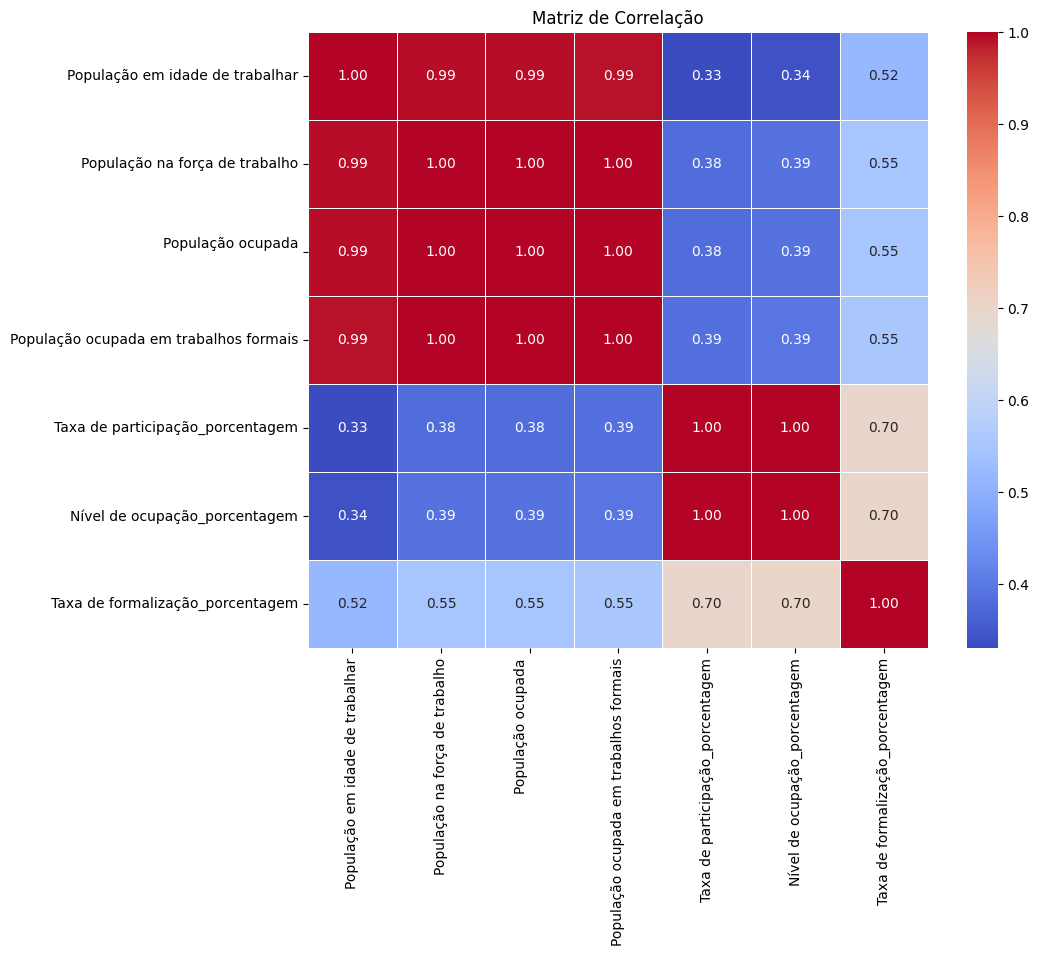

In [ ]:
# Selecionando algumas variáveis
variaveis_selecionadas_2_ = ['População em idade de trabalhar',
                          'População na força de trabalho',
                          'População ocupada\n',
                          'População ocupada em trabalhos formais',
                          'Taxa de participação_porcentagem',
                          'Nível de ocupação_porcentagem',
                          'Taxa de formalização_porcentagem']

# Ajustando o nome da variável
variaveis_selecionadas_2_[2] = 'População ocupada\n'

# Filtrar o DataFrame
df_filtrado = df[variaveis_selecionadas_2_]

# Remover espaços em branco dos valores nas colunas do DataFrame
for coluna in df_filtrado.columns:
    if df_filtrado[coluna].dtype == 'object':
        df_filtrado[coluna] = df_filtrado[coluna].str.replace(" ", "").astype(float)

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtrado.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

# Criando modelo de previsão

In [ ]:
df.head(5)

Características selecionadas  \
0                                              Total   
1  Com alguma pessoa de 2 a 14 anos no domicílio ...   
2                       Alguma deficiência(2_14anos)   
3                       Deficiência visual(2_14anos)   
4                     Deficiência auditiva(2_14anos)   

   População em idade de trabalhar  População na força de trabalho  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                           940.0   
3                            553.0                           365.0   
4                            144.0                           100.0   

   População ocupada\n  População ocupada em trabalhos formais  \
0                  NaN                                     NaN   
1                  NaN                                     NaN   
2                816.0                                   322.0   
3                310.0                                   116.0   
4                 94.0                                    37.0   

   Taxa de participação_porcentagem  Nível de ocupação_porcentagem  \
0                              73.6                           66.6   
1                               NaN                            NaN   
2                              64.9                           56.3   
3                              66.1                           56.0   
4                              68.9                           65.0   

   Taxa de formalização_porcentagem  
0                              52.0  
1                               NaN  
2                              39.4  
3                              37.6  
4                              39.6

In [ ]:
colunas_numericas.head()

População em idade de trabalhar  População na força de trabalho  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                           940.0   
3                            553.0                           365.0   
4                            144.0                           100.0   

   População ocupada\n  População ocupada em trabalhos formais  \
0                  NaN                                     NaN   
1                  NaN                                     NaN   
2                816.0                                   322.0   
3                310.0                                   116.0   
4                 94.0                                    37.0   

   Taxa de participação_porcentagem  Nível de ocupação_porcentagem  \
0                              73.6                           66.6   
1                               NaN                            NaN   
2                              64.9                           56.3   
3                              66.1                           56.0   
4                              68.9                           65.0   

   Taxa de formalização_porcentagem  
0                              52.0  
1                               NaN  
2                              39.4  
3                              37.6  
4                              39.6

In [ ]:
colunas_numericas.dropna()

População em idade de trabalhar  População na força de trabalho  \
3                             553.0                           365.0   
4                             144.0                           100.0   
5                             373.0                           248.0   
6                             276.0                           169.0   
7                             467.0                           272.0   
8                             218.0                           129.0   
22                            636.0                           509.0   
23                            244.0                           202.0   
24                             73.0                            46.0   
25                            159.0                           131.0   
26                            124.0                           100.0   
27                            192.0                           152.0   
28                             93.0                            73.0   
33                            964.0                           192.0   
36                            608.0                            89.0   
42                            813.0                           431.0   
43                            309.0                           163.0   
44                             72.0                            53.0   
45                            214.0                           117.0   
46                            152.0                            69.0   
47                            275.0                           120.0   
48                            125.0                            56.0   
56                            958.0                            78.0   

    População ocupada\n  População ocupada em trabalhos formais  \
3                 310.0                                   116.0   
4                  94.0                                    37.0   
5                 220.0                                    97.0   
6                 154.0                                    54.0   
7                 234.0                                    94.0   
8                 115.0                                    45.0   
22                454.0                                   192.0   
23                176.0                                    67.0   
24                 43.0                                    23.0   
25                120.0                                    57.0   
26                 92.0                                    41.0   
27                136.0                                    64.0   
28                 67.0                                    35.0   
33                182.0                                    59.0   
36                 87.0                                    35.0   
42                362.0                                   130.0   
43                134.0                                    50.0   
44                 51.0                                    14.0   
45                100.0                                    40.0   
46                 62.0                                    13.0   
47                 97.0                                    30.0   
48                 49.0                                    10.0   
56                 75.0                                    31.0   

    Taxa de participação_porcentagem  Nível de ocupação_porcentagem  \
3                               66.1                           56.0   
4                               68.9                           65.0   
5                               66.6                           59.0   
6                               61.1                           55.8   
7                               58.2                           50.0   
8                               58.9                           52.8   
22                              80.0                           71.4   
23                              82.7                           71.8   
24                              63.4               

In [ ]:
# Separando as colunas para o XGBOOST com hiperparêmetros
df_xgb_hiper= colunas_numericas
y_hiper = df_xgb_hiper['Taxa de participação_porcentagem']
x_hiper = df_xgb_hiper.drop('Taxa de participação_porcentagem', axis=1)
# Separando as informações do arquivo de dados em treino e teste
x_hiper_train, x_hiper_test, y_hiper_train, y_hiper_test = train_test_split(x_hiper, y_hiper, test_size=0.30, random_state=42)

In [ ]:
# Criando o objeto da regressão XGBOOST
xgb_hiper_regressor = XGBRegressor(objective='reg:squarederror',  # é uma regressão e modelo tentará minimizar o erro quadrático médio
                             n_estimators=100,  # Número de árvores
                                                # Atenção: um valor maior pode levar a um modelo mais complexo e pode exigir mais tempo de treinamento
                             learning_rate=0.1, # Taxa de aprendizado
                                                # A taxa de aprendizado controla a contribuição de cada árvore para as previsões finais.
                                                # Um valor mais baixo torna o modelo mais robusto, mas pode requerer mais árvores.
                                                # Um valor mais alto pode levar a um ajuste excessivo
                             max_depth=6, # Profundidade máxima da árvore: controla a profundidade máxima das árvores de decisão
                                          # Valores mais altos podem tornar o modelo mais complexo e propenso a overfitting,
                                          # enquanto valores mais baixos podem resultar em um modelo underfitting
                             subsample=0.8, # Fração das amostras usadas para treinamento de cada árvore
                             random_state=42)

# Verificar e substituir valores NaN
nan_count = np.isnan(y_hiper_train).sum()
if nan_count > 0:
    print(f"Número de valores NaN: {nan_count}")
    y_hiper_train = np.nan_to_num(y_hiper_train, nan=np.nanmean(y_hiper_train))

# Verificar e substituir valores infinitos
inf_count = np.isinf(y_hiper_train).sum()
if inf_count > 0:
    print(f"Número de valores infinitos: {inf_count}")
    y_hiper_train = np.where(np.isinf(y_hiper_train), np.nanmean(y_hiper_train[np.isfinite(y_hiper_train)]), y_hiper_train)

# Verificar valores mínimos e máximos
print(f"Valor mínimo: {y_hiper_train.min()}, Valor máximo: {y_hiper_train.max()}")

# Re-treinar o modelo
xgb_hiper_regressor.fit(x_hiper_train, y_hiper_train)

Número de valores NaN: 8
Valor mínimo: 8.1, Valor máximo: 82.7


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Utilizando o modelo nos dados de teste
xgb_hiper_result = xgb_hiper_regressor.predict(x_hiper_test)
xgb_hiper_result

array([65.176765 , 64.75477  , 17.162031 , 11.992035 , 56.08377  ,
        8.6830435,  8.489498 , 82.20966  , 27.810328 , 14.12097  ,
       65.32464  , 58.245308 , 14.023891 , 20.229359 , 57.78234  ,
       10.348351 , 54.9375   , 64.89397  ], dtype=float32)

In [ ]:
# Criando um dataframe com os valores do teste (reais) e da previsão (preditos)
xgb_hiper_regressor=pd.DataFrame({'Real': y_hiper_test, 'Predicted':xgb_hiper_result})

# Formatando os valores preditos
xgb_hiper_regressor['Predicted'] = round(xgb_hiper_regressor['Predicted'],3)

# Criando uma razão entre o valor predito e o real para saber o quanto está próximo ou não do real
xgb_hiper_regressor['Razao'] = round(xgb_hiper_regressor['Predicted']/xgb_hiper_regressor['Real'],3)

# Exibindo os dados
xgb_hiper_regressor.head(15)

Real  Predicted  Razao
0   73.6  65.177002  0.886
5   66.6  64.754997  0.972
34  17.9  17.162001  0.959
13  13.7  11.992000  0.875
45  54.6  56.084000  1.027
53   9.0   8.683000  0.965
57   7.4   8.489000  1.147
25  82.7  82.209999  0.994
47  43.7  27.809999  0.636
12  14.4  14.121000  0.981
49  65.6  65.324997  0.996
3   66.1  58.244999  0.881
36  14.6  14.024000  0.961
31  21.0  20.229000  0.963
8   58.9  57.782001  0.981

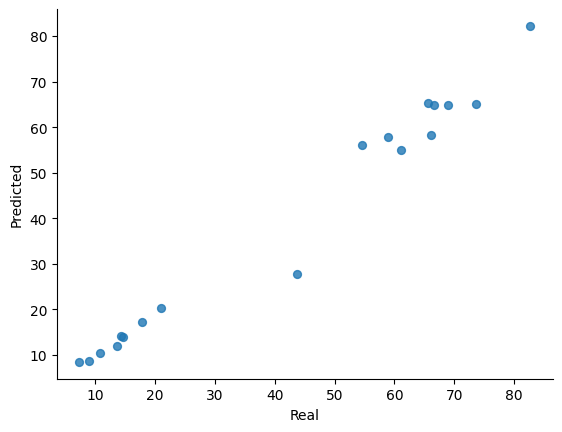

In [ ]:
xgb_hiper_regressor.plot(kind='scatter', x='Real', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)